In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [236]:
"""SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale"""

"SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.\nMSSubClass: The building class\nMSZoning: The general zoning classification\nLotFrontage: Linear feet of street connected to property\nLotArea: Lot size in square feet\nStreet: Type of road access\nAlley: Type of alley access\nLotShape: General shape of property\nLandContour: Flatness of the property\nUtilities: Type of utilities available\nLotConfig: Lot configuration\nLandSlope: Slope of property\nNeighborhood: Physical locations within Ames city limits\nCondition1: Proximity to main road or railroad\nCondition2: Proximity to main road or railroad (if a second is present)\nBldgType: Type of dwelling\nHouseStyle: Style of dwelling\nOverallQual: Overall material and finish quality\nOverallCond: Overall condition rating\nYearBuilt: Original construction date\nYearRemodAdd: Remodel date\nRoofStyle: Type of roof\nRoofMatl: Roof material\nExterior1st: Exterior covering on house\nE

In [5]:
routpc="C:/Users/BUCEFALO/Desktop/Trabajos Data/Mlops/BostonHousePricing/"
routnb="C:/Users/emi87/OneDrive/Escritorio/Data Projects/Ml Projects/BostonHousePricing/"

In [6]:
df = pd.read_csv(routpc+"/train.csv")
dftest = pd.read_csv(routpc+"test.csv")


In [8]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [14]:
# Agrupación de Precios segun La calidad de la Cocina.
grafo=df.groupby("KitchenQual")["SalePrice"].mean()
print(round(grafo,2))

KitchenQual
Ex    328554.67
Fa    105565.21
Gd    212116.02
TA    139962.51
Name: SalePrice, dtype: float64


In [28]:
dfloco = dftest.loc[dftest["KitchenQual"].isnull()]
print(dfloco)

      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
95  1556          50       RL         72.0    10632   Pave   NaN      IR1   

   LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
95         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  
95       0      1    2010       COD         Normal  

[1 rows x 80 columns]


In [26]:
dfloco.dtype

dtype('bool')

In [24]:
dfloco.loc[dfloco["KitchenQual"]=="true"]

KeyError: 'KitchenQual'

In [243]:
dftest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [244]:
dftest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Análisis Descriptivo :





# - Información del Set de Datos









In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [246]:
# Existen 1460 registros y 80 variables.

In [247]:
# correlation_matrix = df.corr()

# # Crear un mapa de calor con Seaborn
# plt.figure(figsize=(50, 20))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Mapa de Correlación')
# plt.show()

#- Verificación de Valores Nulos y eliminación:



In [248]:
for columnas in df.columns:
  if df[columnas].isnull().sum() > 1:
    print(f'{columnas} tiene {df[columnas].isnull().sum()} valores nulos')

LotFrontage tiene 259 valores nulos
Alley tiene 1369 valores nulos
MasVnrType tiene 872 valores nulos
MasVnrArea tiene 8 valores nulos
BsmtQual tiene 37 valores nulos
BsmtCond tiene 37 valores nulos
BsmtExposure tiene 38 valores nulos
BsmtFinType1 tiene 37 valores nulos
BsmtFinType2 tiene 38 valores nulos
FireplaceQu tiene 690 valores nulos
GarageType tiene 81 valores nulos
GarageYrBlt tiene 81 valores nulos
GarageFinish tiene 81 valores nulos
GarageQual tiene 81 valores nulos
GarageCond tiene 81 valores nulos
PoolQC tiene 1453 valores nulos
Fence tiene 1179 valores nulos
MiscFeature tiene 1406 valores nulos


In [249]:
# nulltofill = [columnas for columnas in df.columns if df[columnas].isnull().sum()>1 and  df[columnas].isnull().sum()<500]

In [250]:
# nulltodelete = [columnas for columnas in df.columns if df[columnas].isnull().sum()>500]

In [251]:
# Nulltofill son las variables con una cantidad moderada de valores nulos que serán tratados posteriormente.
# en el caso de Nulltodelete serán eliminados por la cantidad grande.

In [252]:
round(df.describe()).T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.0,422.0,1.0,366.0,730.0,1095.0,1460.0
MSSubClass,1460.0,57.0,42.0,20.0,20.0,50.0,70.0,190.0
LotFrontage,1201.0,70.0,24.0,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,10517.0,9981.0,1300.0,7554.0,9478.0,11602.0,215245.0
OverallQual,1460.0,6.0,1.0,1.0,5.0,6.0,7.0,10.0
OverallCond,1460.0,6.0,1.0,1.0,5.0,5.0,6.0,9.0
YearBuilt,1460.0,1971.0,30.0,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1460.0,1985.0,21.0,1950.0,1967.0,1994.0,2004.0,2010.0
MasVnrArea,1452.0,104.0,181.0,0.0,0.0,0.0,166.0,1600.0
BsmtFinSF1,1460.0,444.0,456.0,0.0,0.0,384.0,712.0,5644.0


In [253]:
(df["ScreenPorch"]==0).sum()

np.int64(1344)

In [254]:
variable = round(df.describe(include=['O'])).T

In [255]:
# variable["Porc"] = variable["freq"]/len(df)

In [256]:
# variable["Porc"] = variable["Porc"].apply(lambda x: round(x,2))

In [257]:
# categoricalToDelete = [valores for valores in variable.index if variable.loc[valores, "count"] < 700] # Al haber variables categoricas con pocos datos creo una categoria para eliminarlas.


# División de Variables Categoricas, Numéricas (discretas y continuas)


In [258]:
variables_categoricas = [columnas for columnas in df.columns if df[columnas].dtype =="O"]

In [259]:
variables_numericas = [columnas for columnas in df.columns if df[columnas].dtype !="O" and len(df[columnas].unique())>20 ]

In [260]:
variables_discretas = [columnas for columnas in variables_numericas if len(df[columnas].unique()) < 20]

In [261]:
variables_temporales = [columna for columna in df.columns if 'Year' in columna or "Yr" in columna]


<Axes: xlabel='GrLivArea', ylabel='Count'>

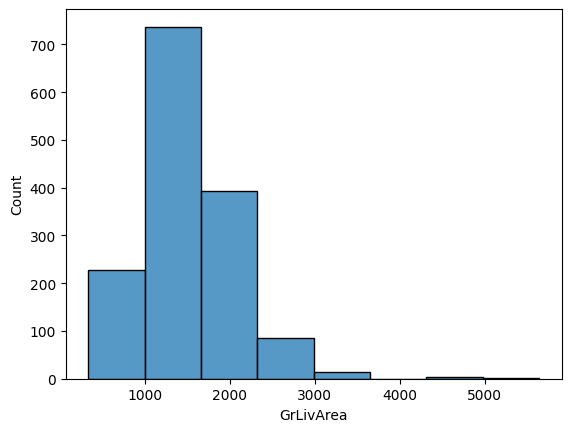

In [262]:
sns.histplot(x=df["GrLivArea"], bins = 8)

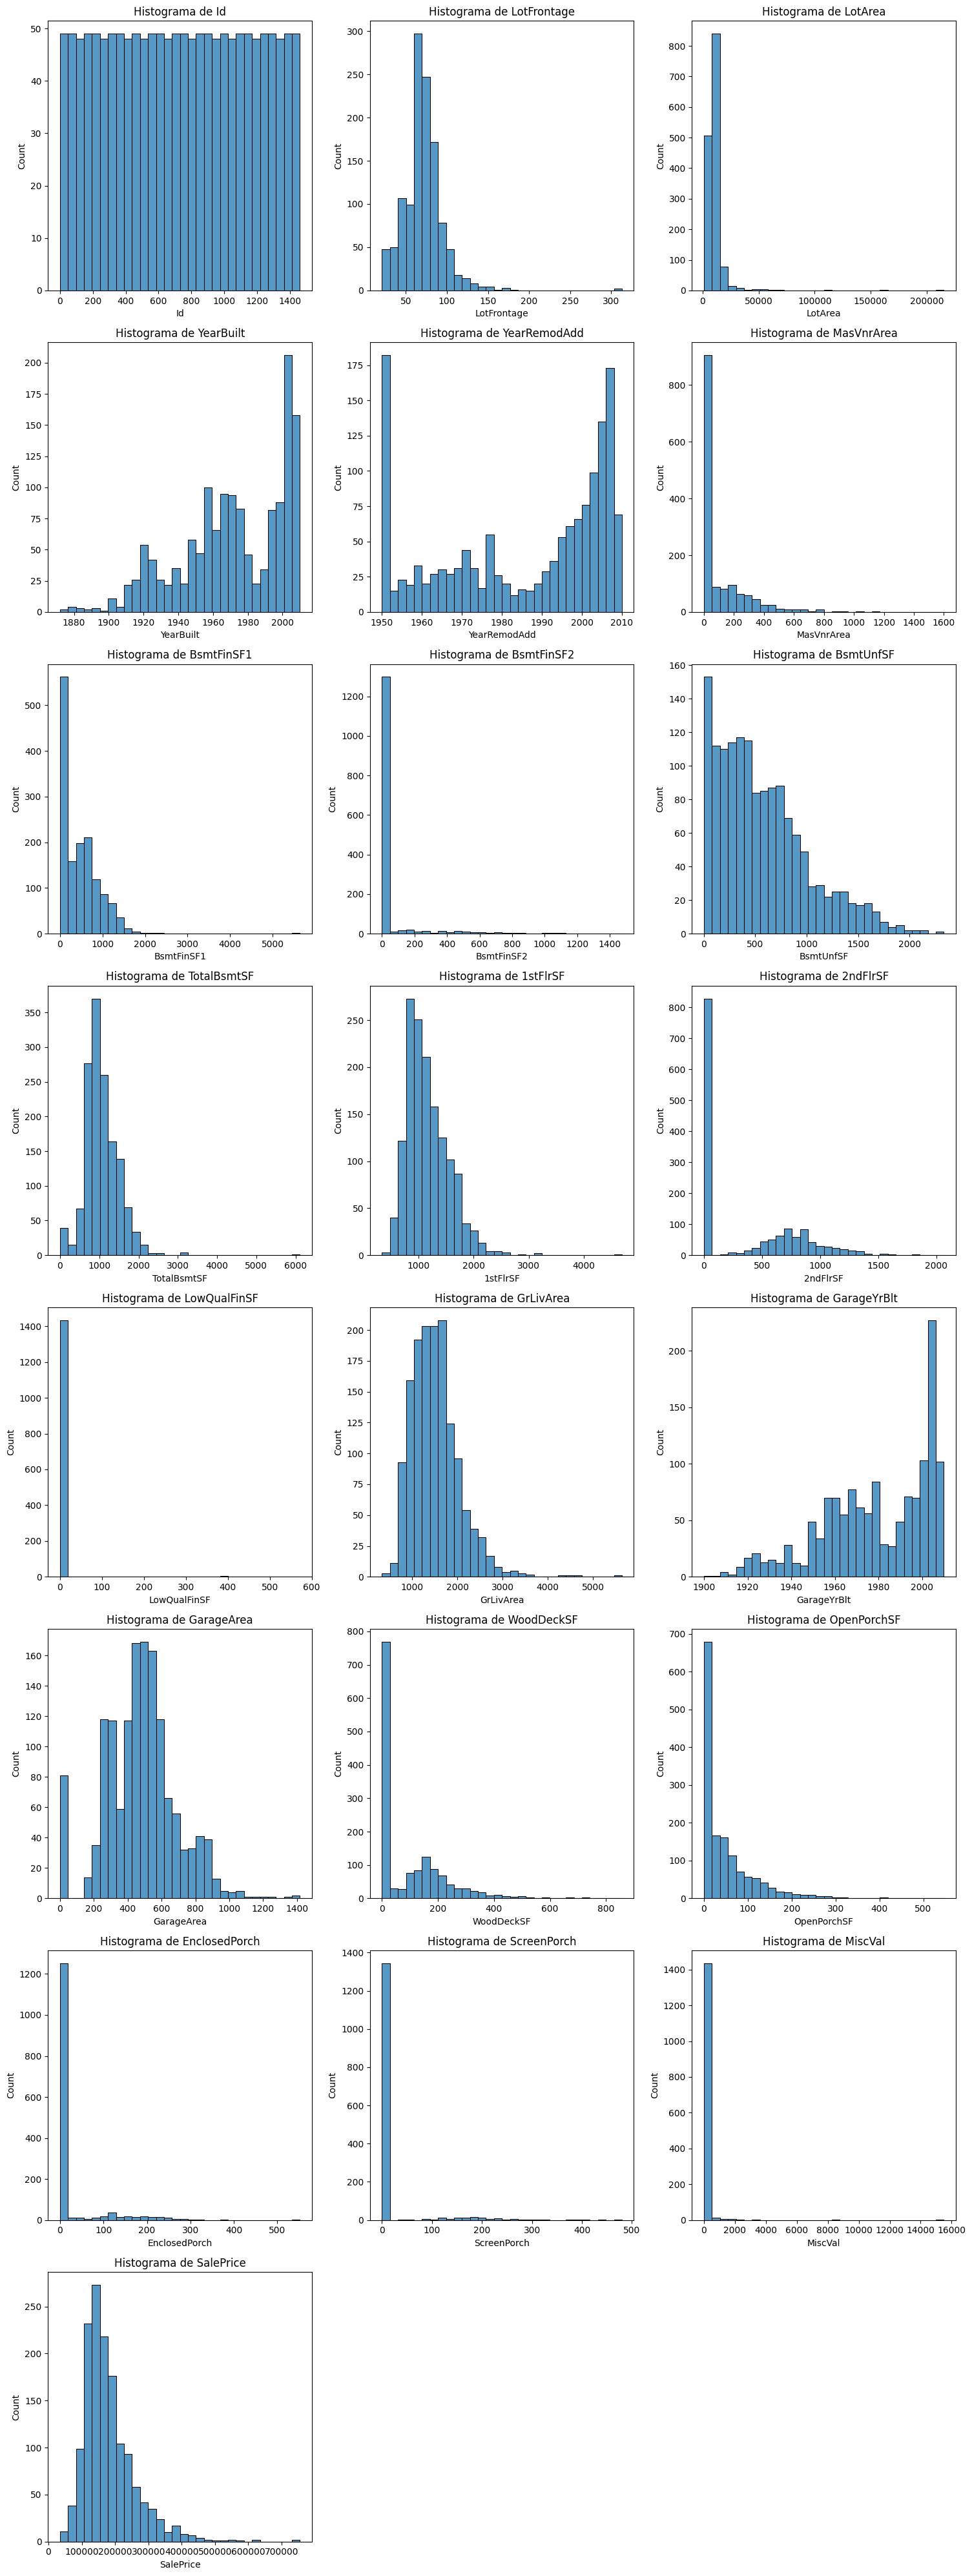

In [263]:
num_variables = len(variables_numericas) ## esto se va a usar para hacer los subplots para saber las columnas
num_filas = (num_variables + 2) // 3  # Redondeo hacia arriba de la división entera

fig, axes = plt.subplots(num_filas, 3, figsize=(15, num_filas*5))  # Crear un arreglo de subgráficos
for i, variable in enumerate(variables_numericas):

    fila_actual = i // 3
    columna_actual = i % 3

    data = df.copy()  # Hacer una copia del DataFrame original
    x = data[variable]

    sns.histplot(x=x, bins=30, ax=axes[fila_actual, columna_actual])
    axes[fila_actual, columna_actual].set_title(f'Histograma de {variable}')


for i in range(num_variables, num_filas*3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

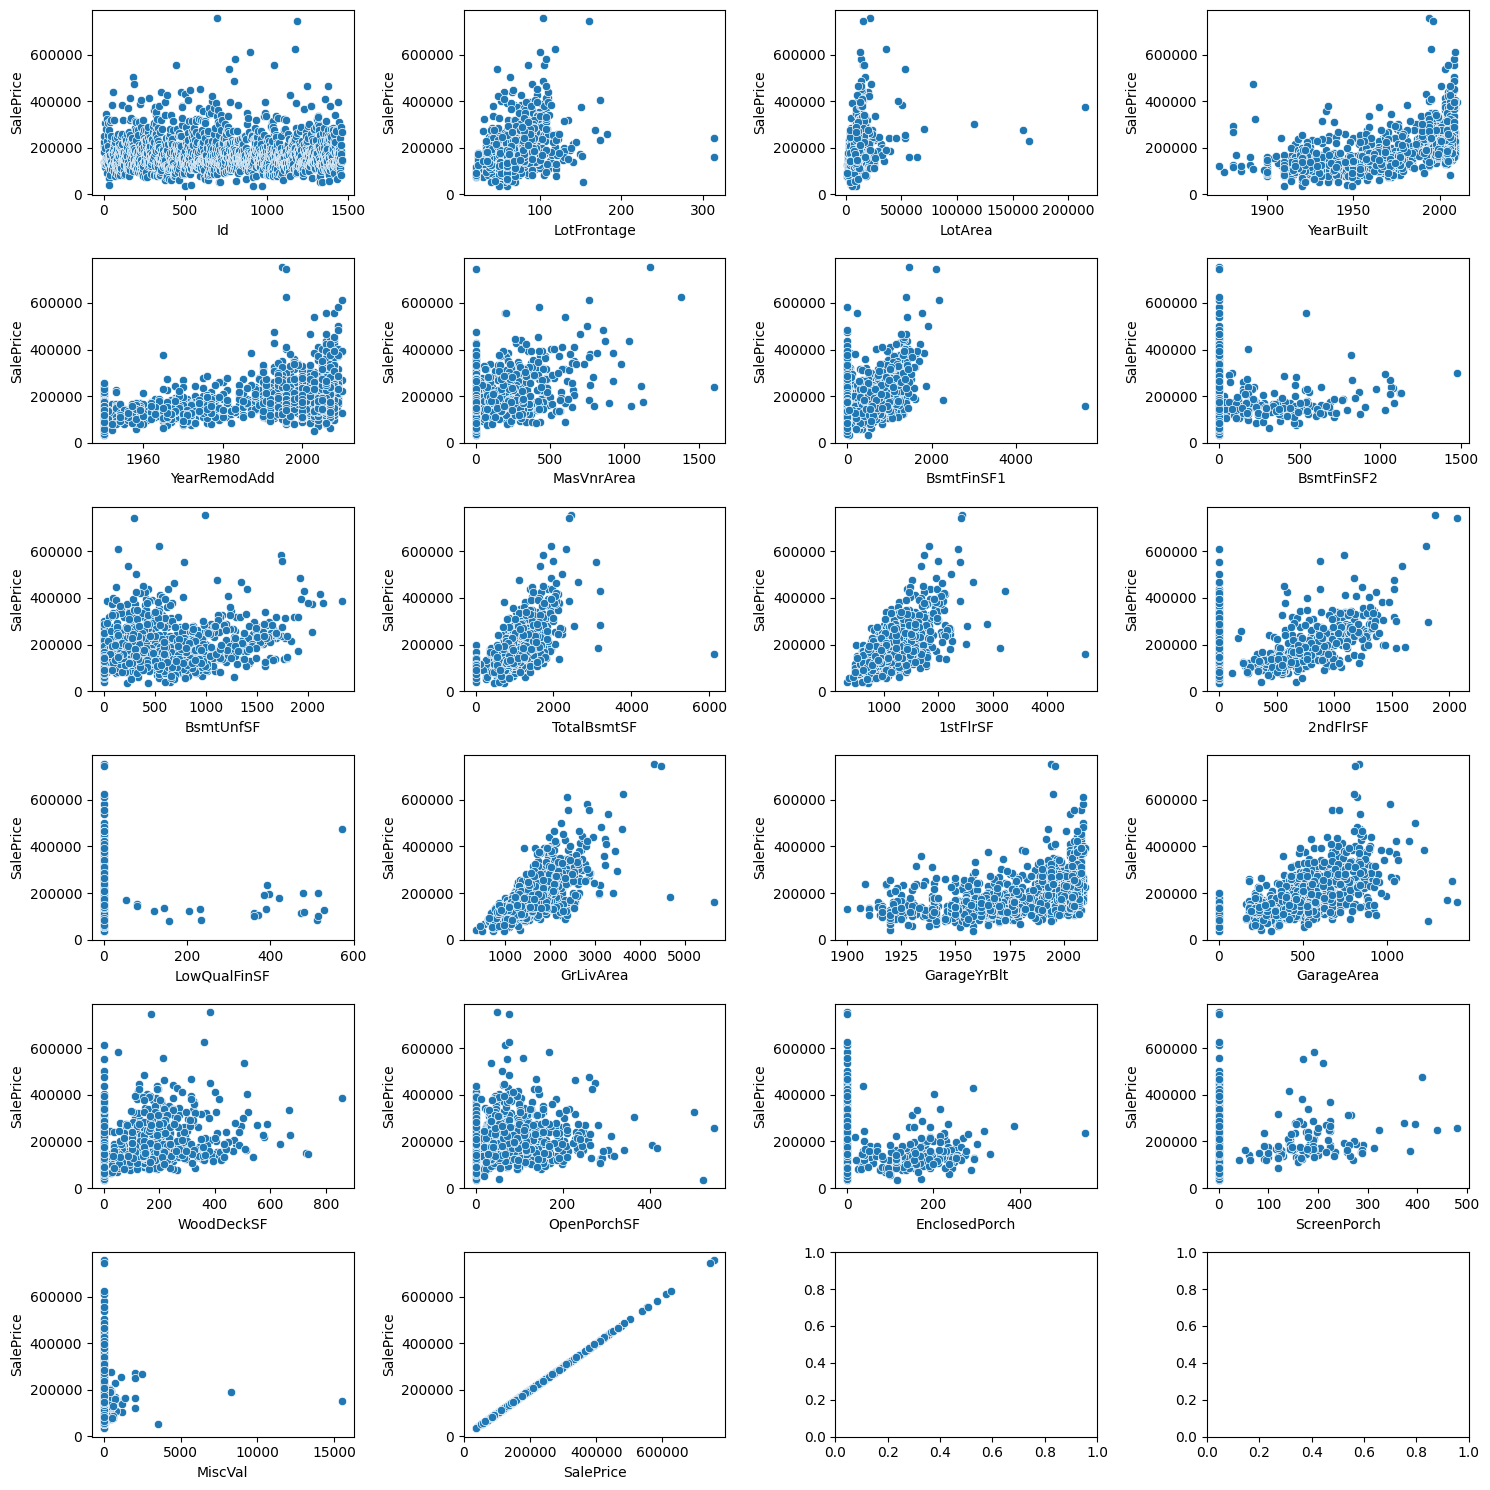

In [264]:
variables = len(variables_numericas)
filas = (variables+3)//4

# Preparacion del gráfico:
fig,axes = plt.subplots(filas,4, figsize=(15,15))

#Iterador de graficos:
for i,columnas in enumerate(variables_numericas):
  data=df.copy()
  filadata = i//4
  coldata = i % 4
  sns.scatterplot(x=data[columnas], y= data["SalePrice"], ax=axes[filadata,coldata])
  plt.tight_layout()
for i in range(variables, filas+3):
  fig.delaxes(ax.flatten()[i])
plt.show()

# Análisis De Outliers


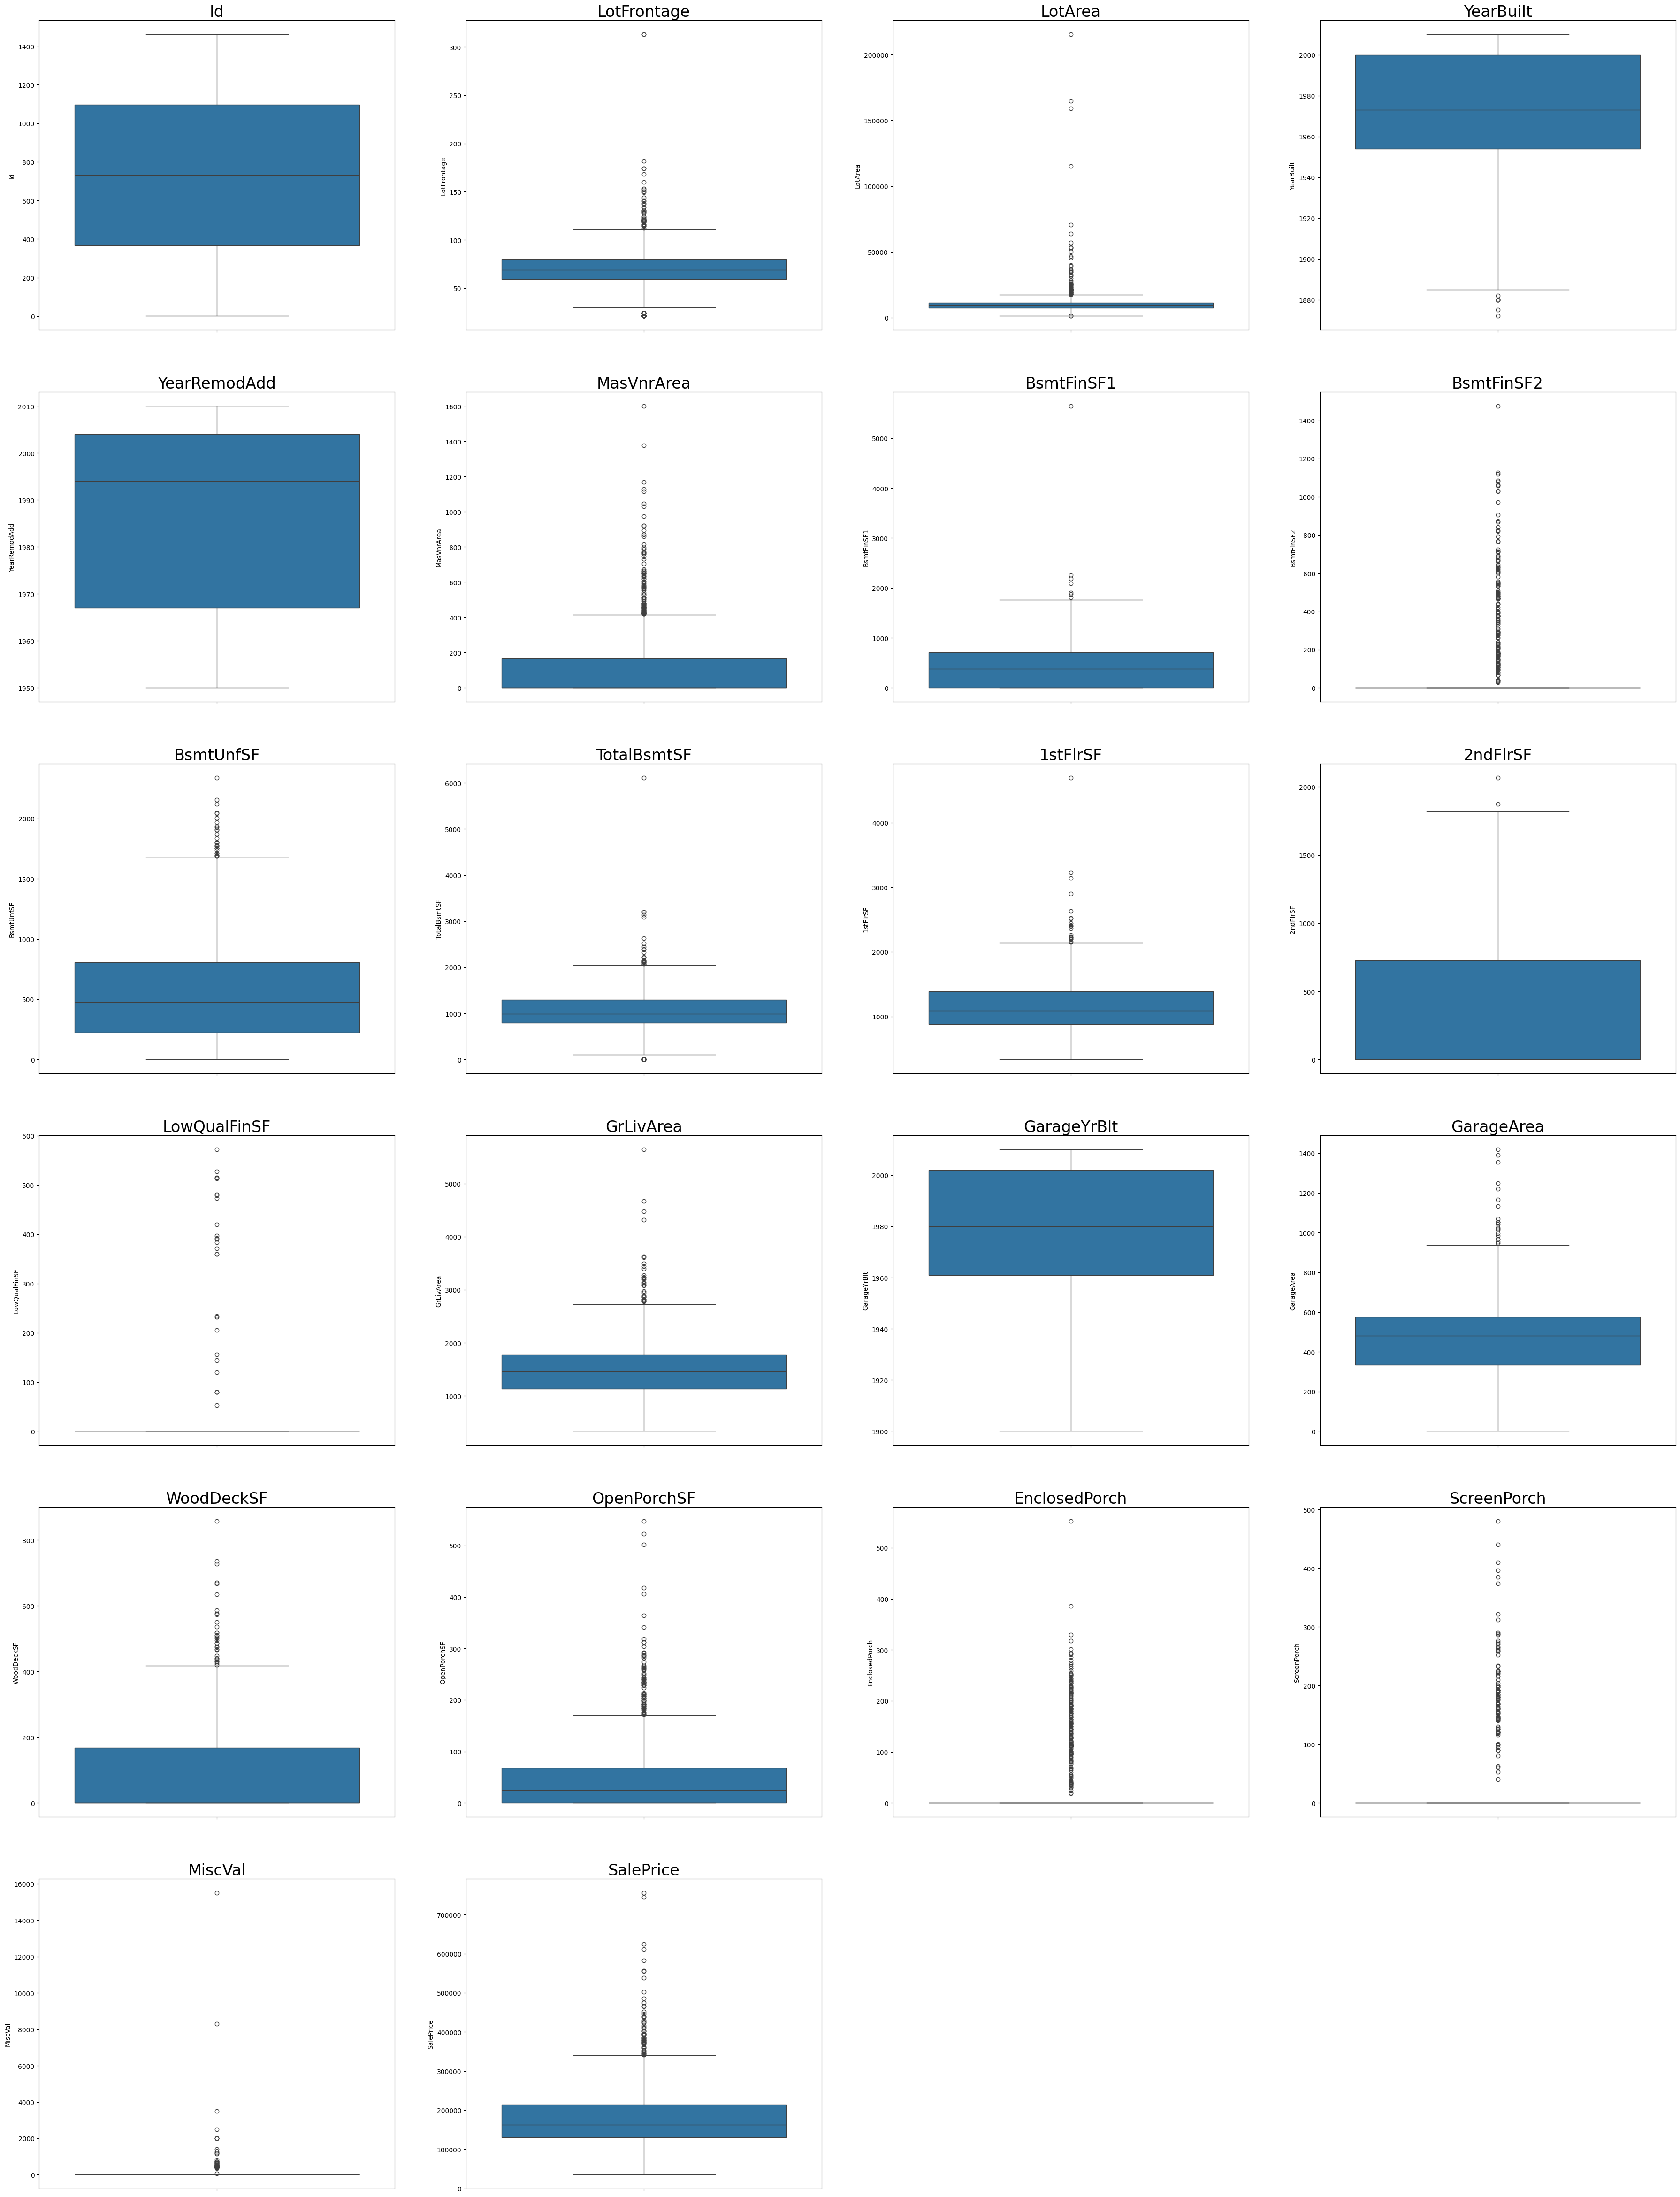

In [265]:
cantidadvariables= len(variables_numericas)
filasplot= (cantidadvariables+3) //4

fig,axes = plt.subplots(filasplot,4,figsize=(45,filasplot*10))
for i, variable in enumerate(variables_numericas):
  data = data.copy()
  fila = i // 4
  columna = i % 4
  sns.boxplot(y=data[variable],ax=axes[fila,columna])
  axes[fila, columna].set_title(variable, fontsize=24)  # Título del gráfico

for i in range(cantidadvariables,cantidadvariables+2):

  fig.delaxes(axes.flatten()[i])
plt.show()

#Variables Categoricas y Precio de vent

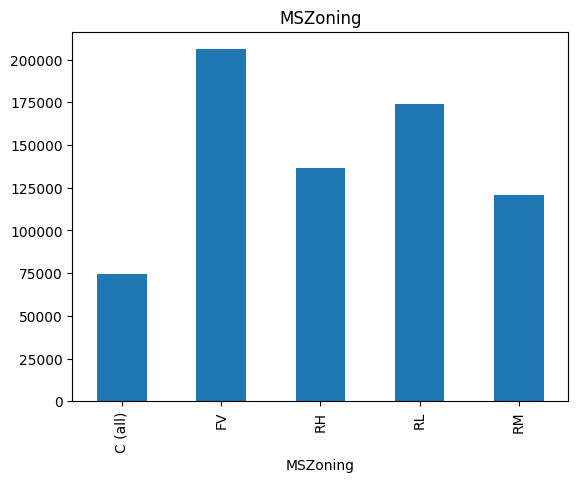

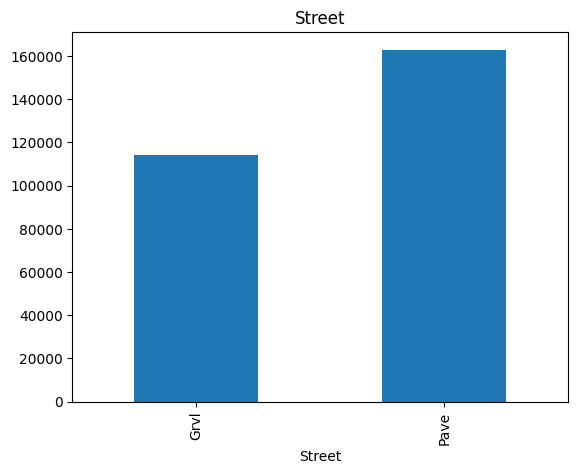

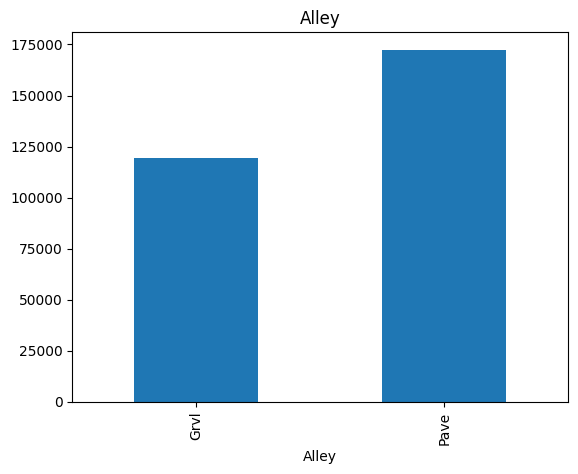

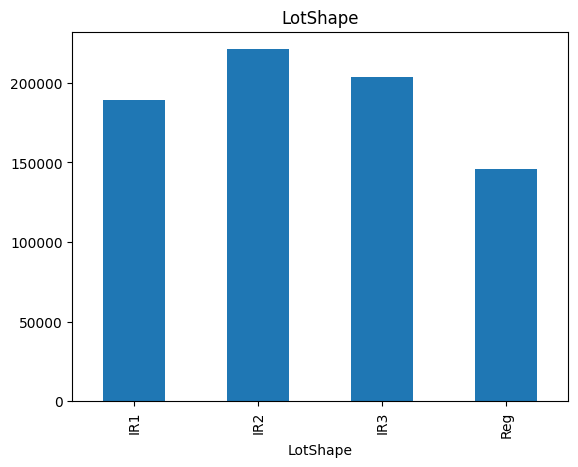

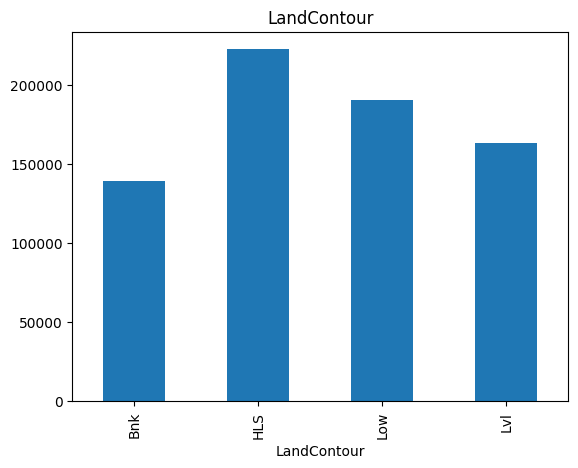

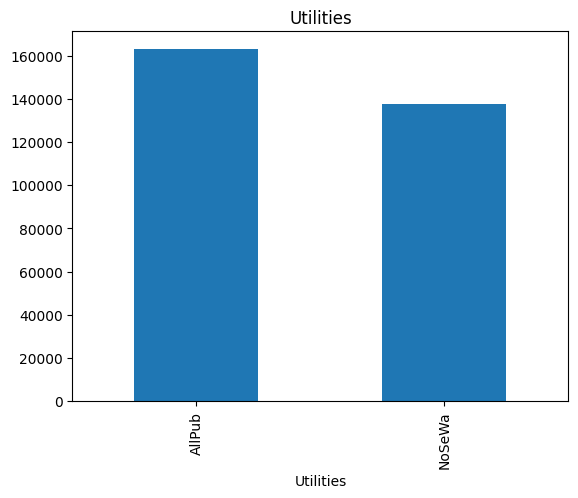

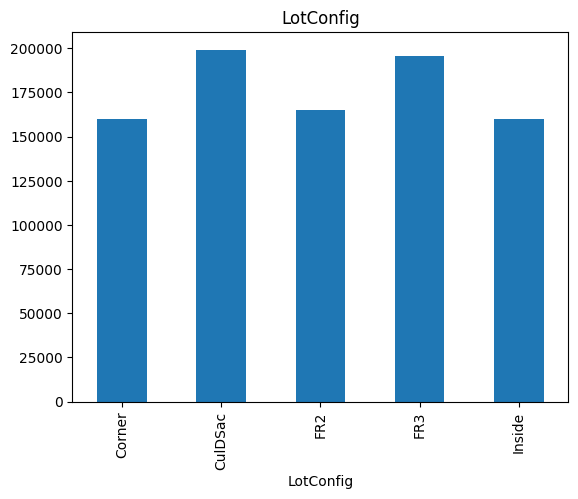

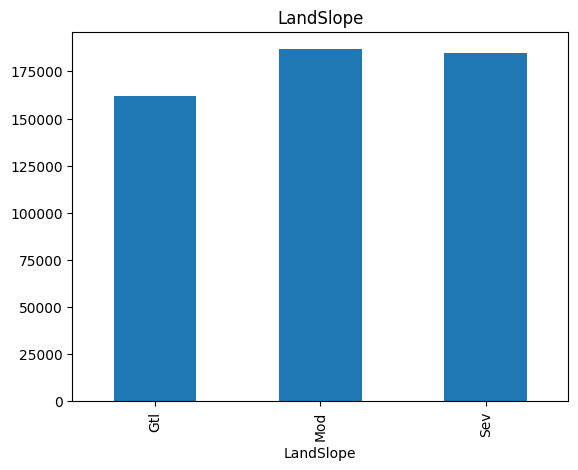

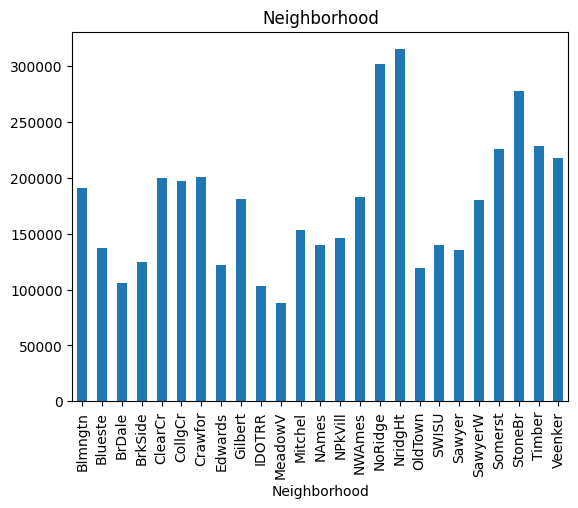

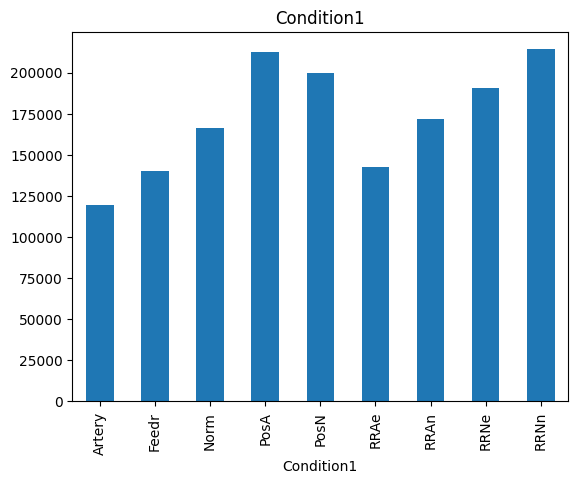

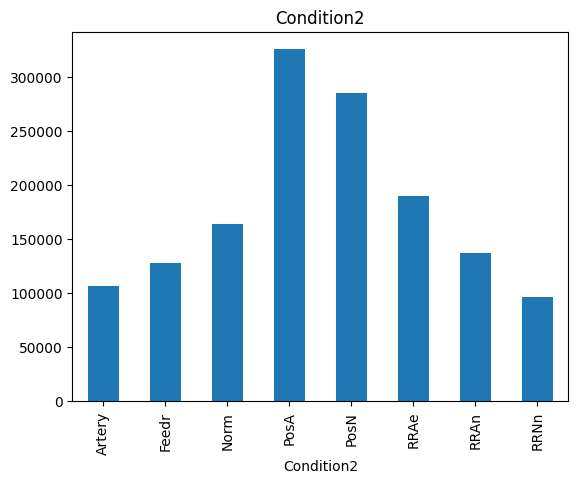

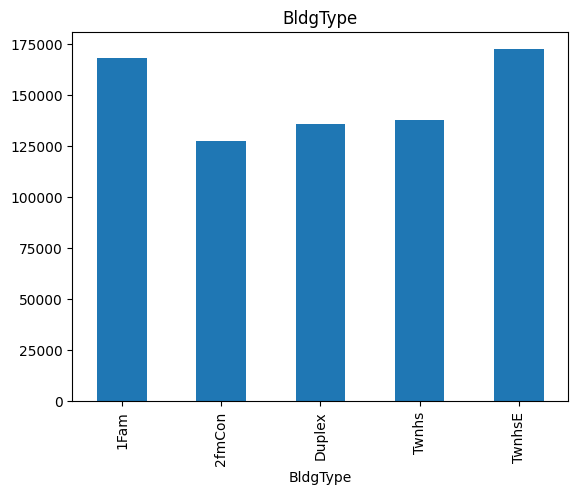

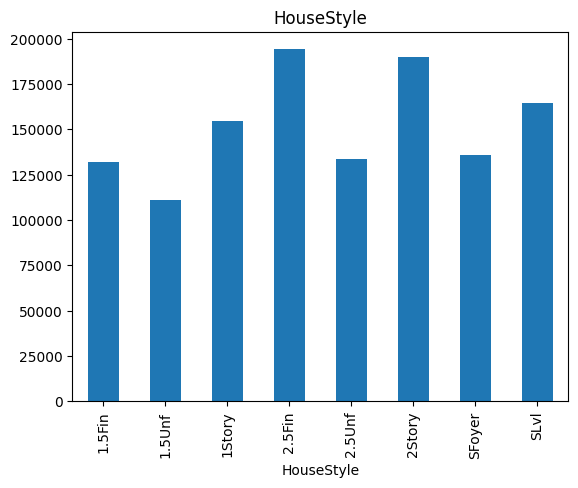

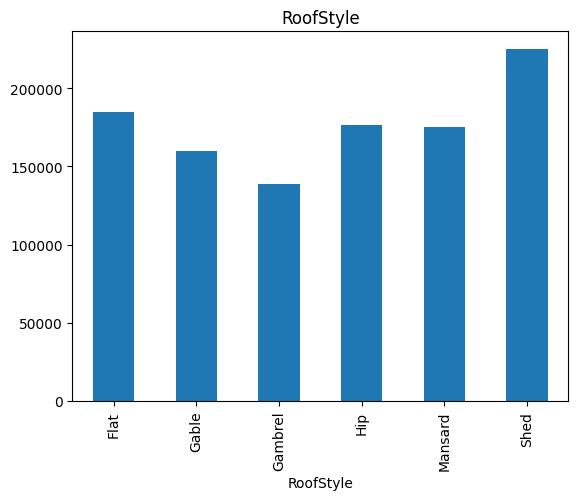

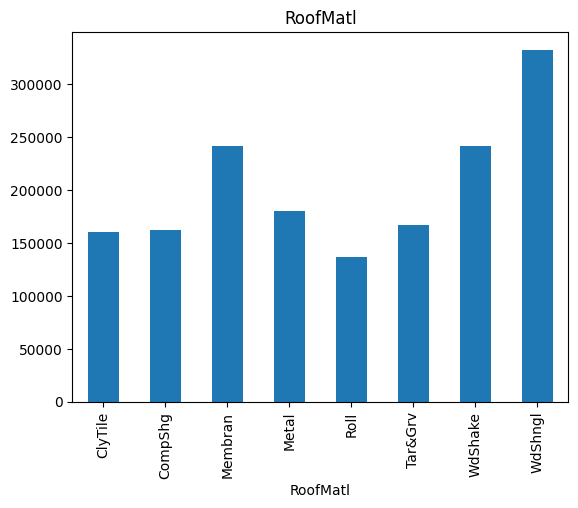

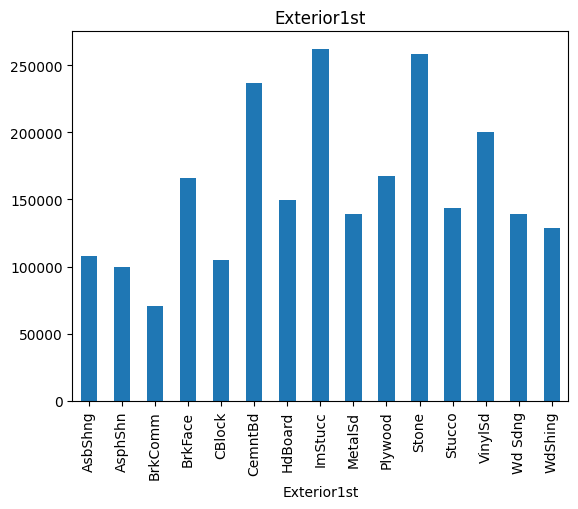

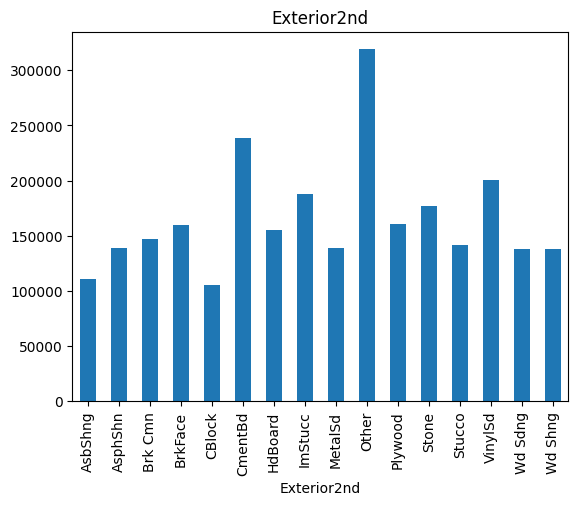

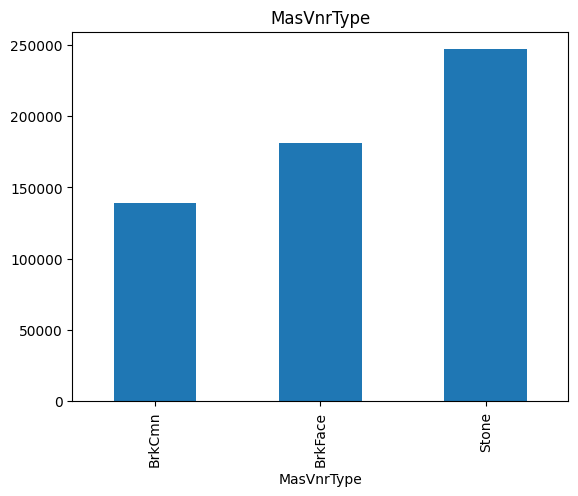

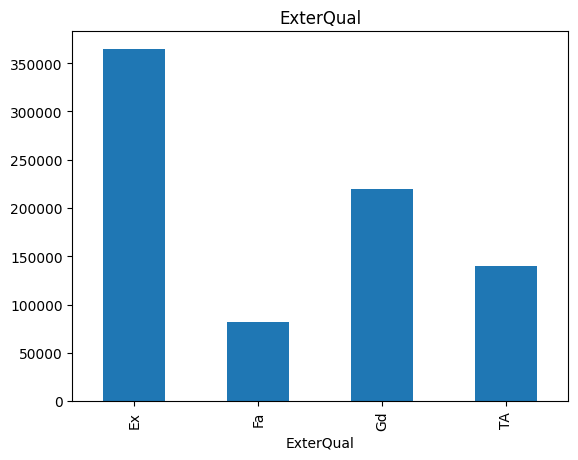

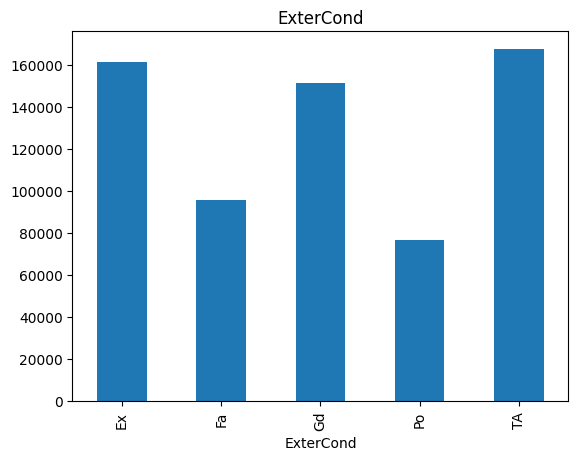

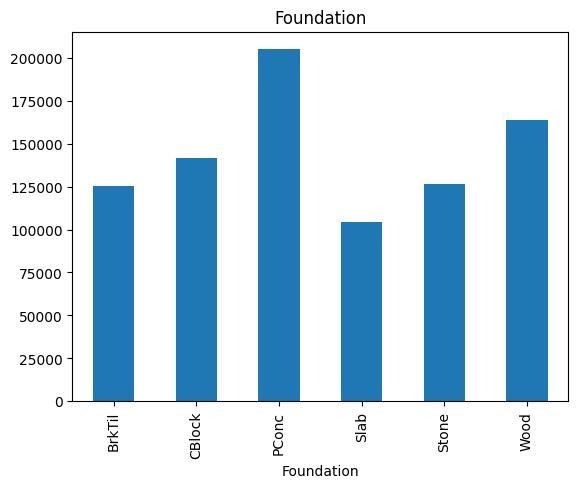

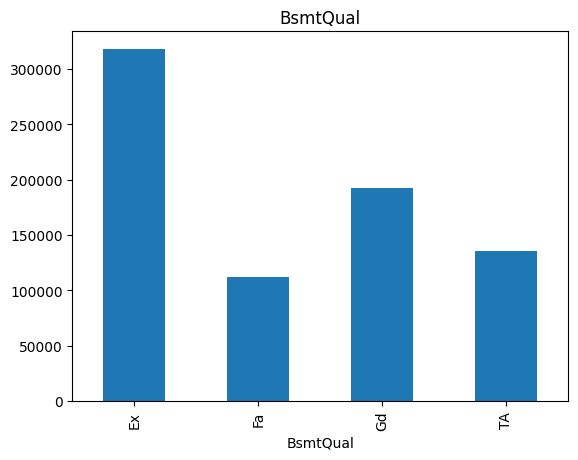

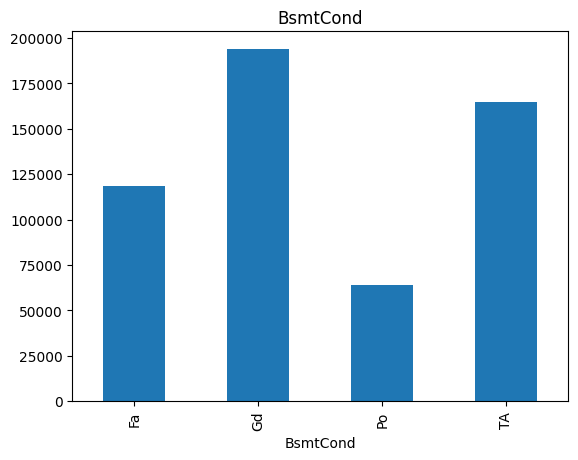

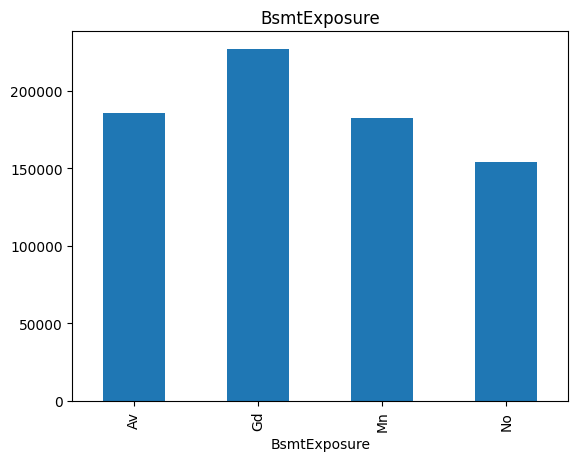

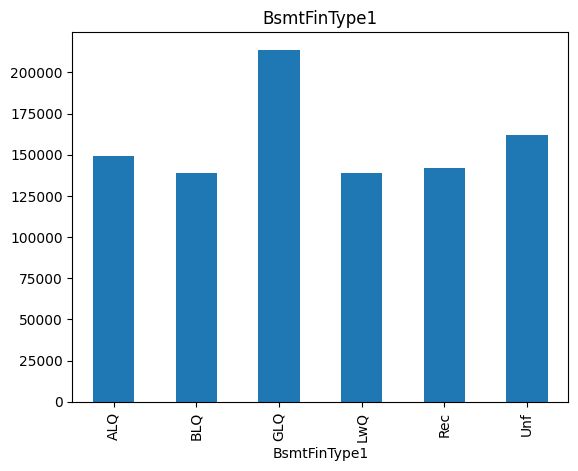

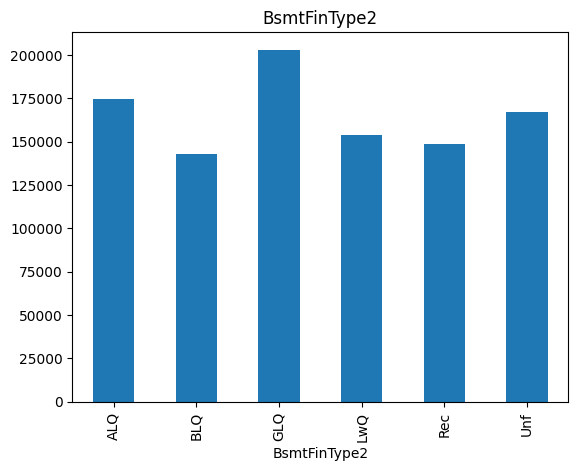

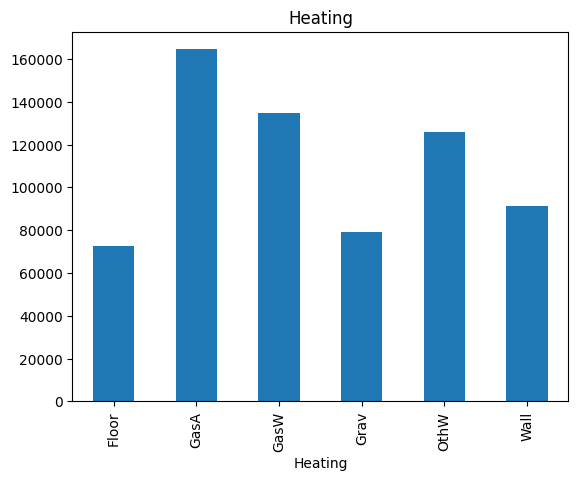

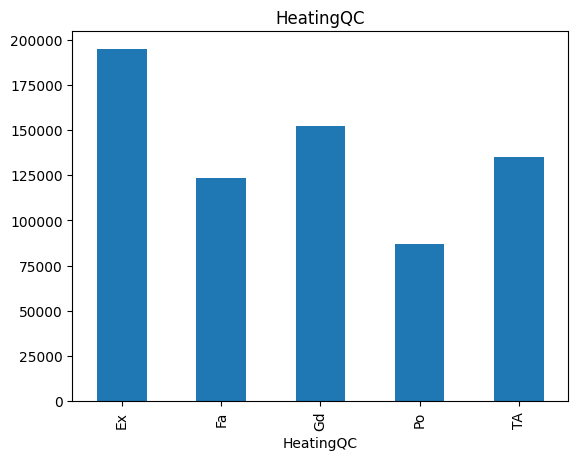

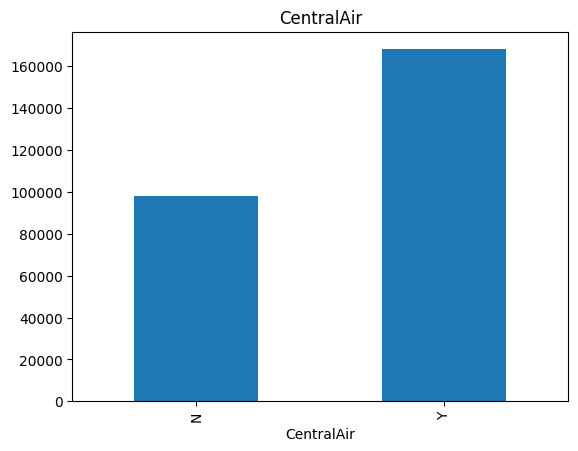

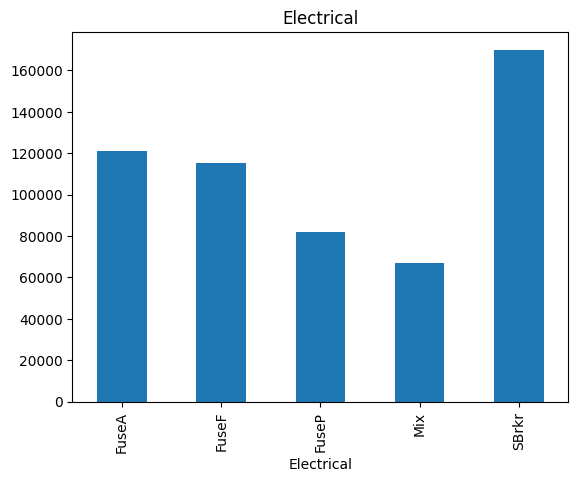

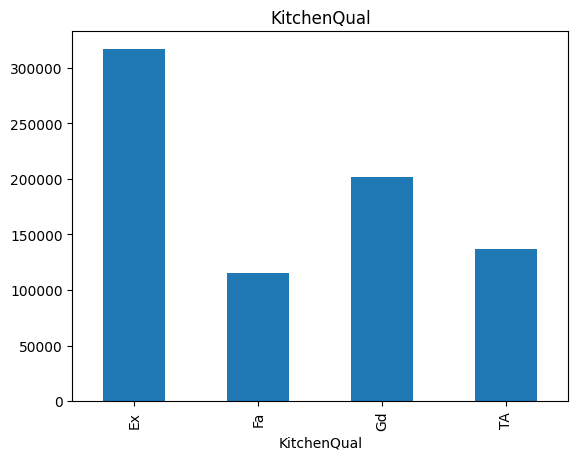

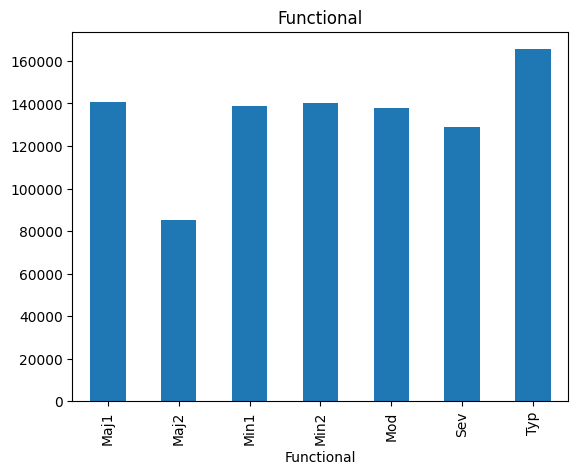

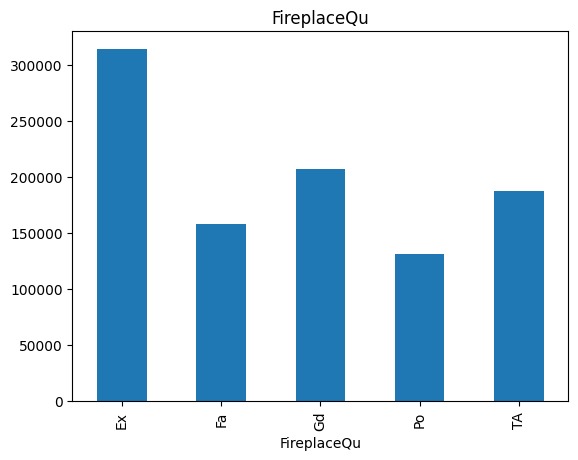

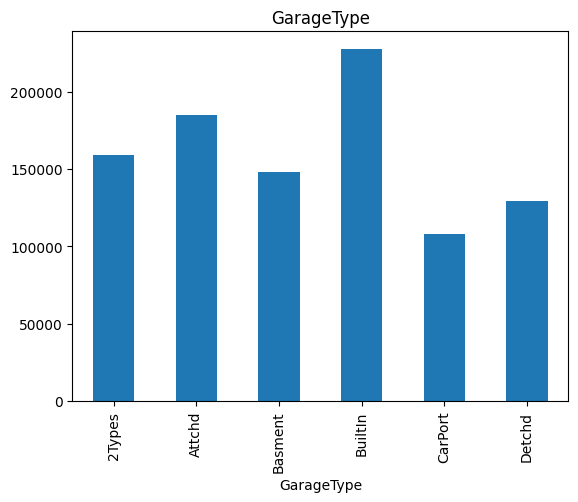

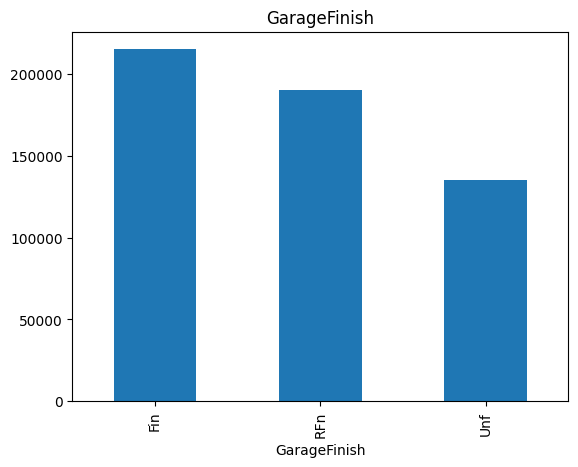

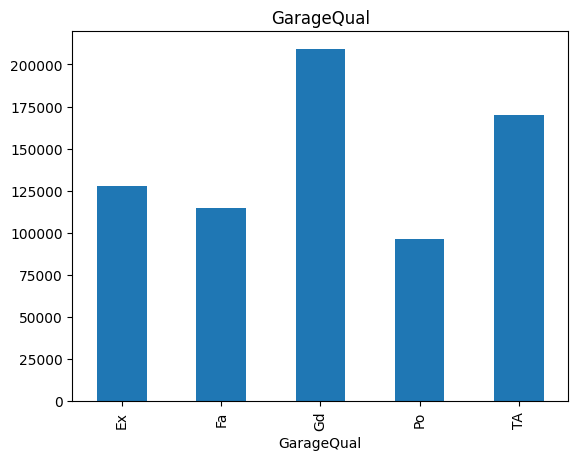

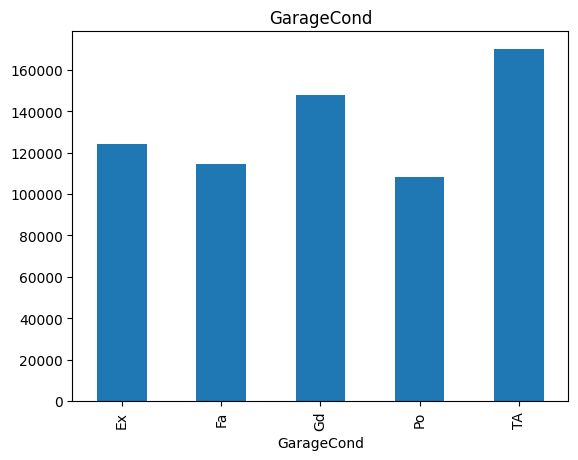

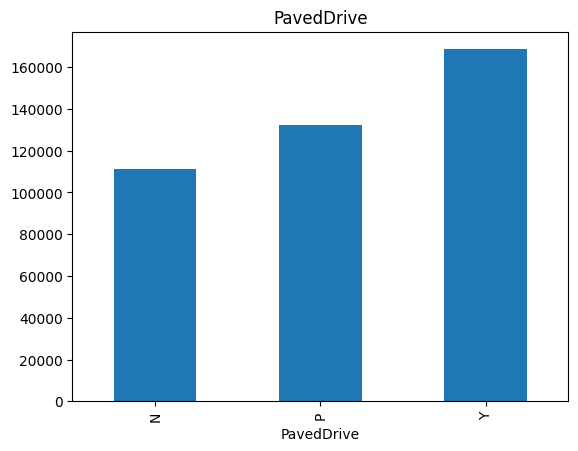

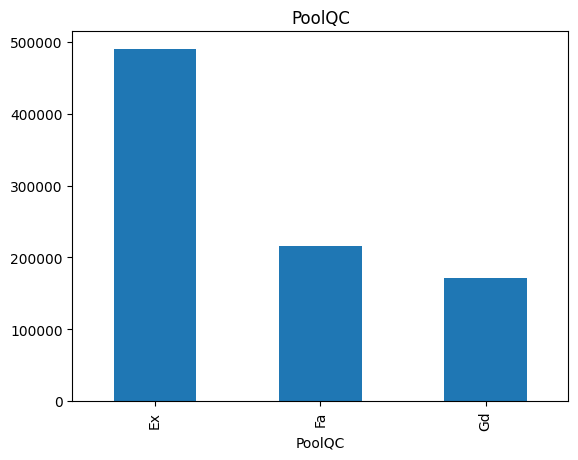

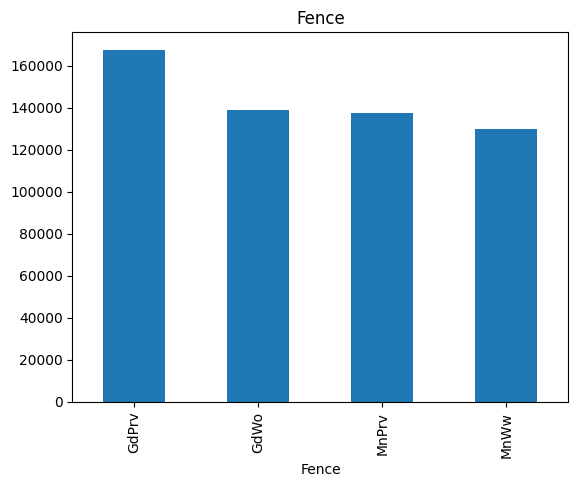

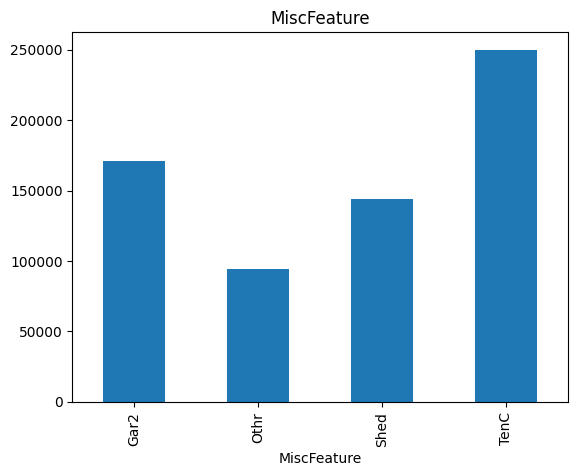

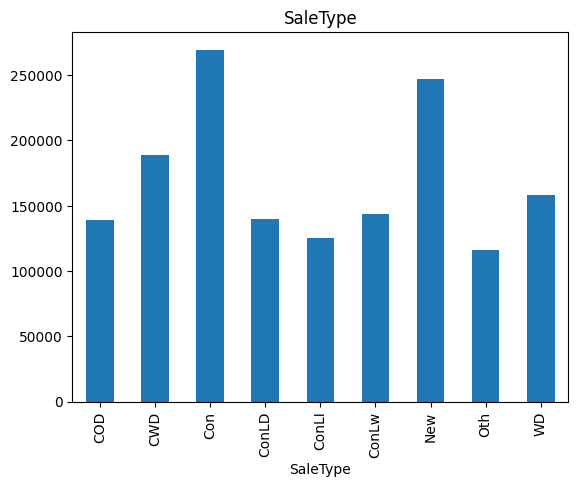

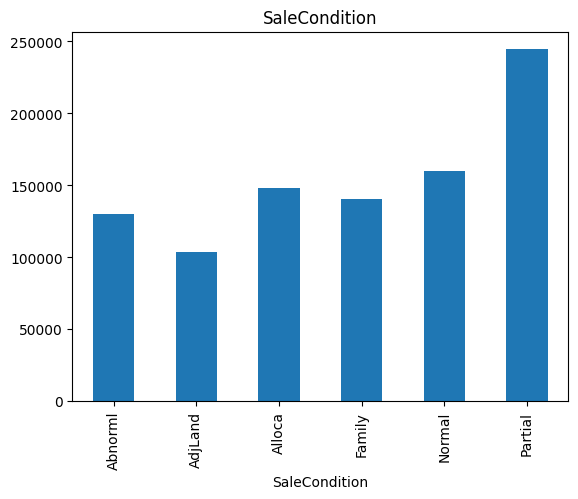

In [266]:
for feature in variables_categoricas:
    data=df.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.show()

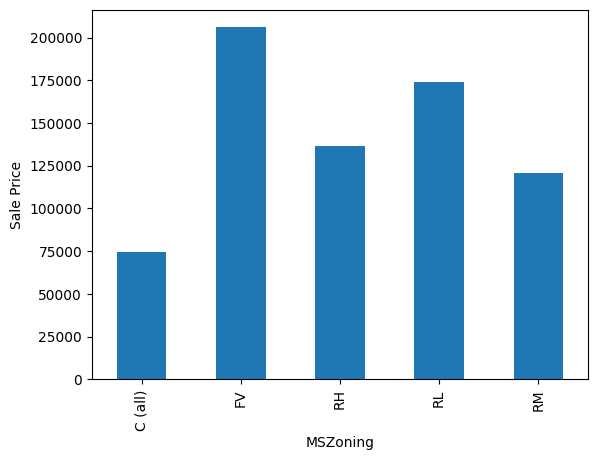

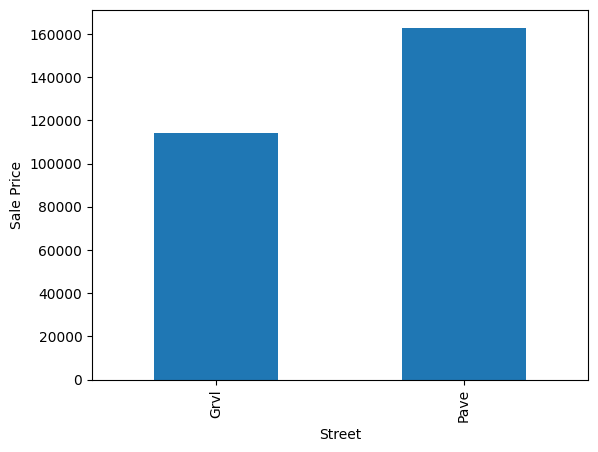

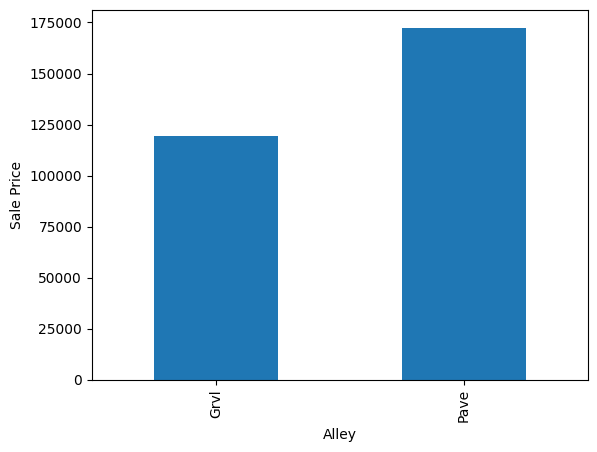

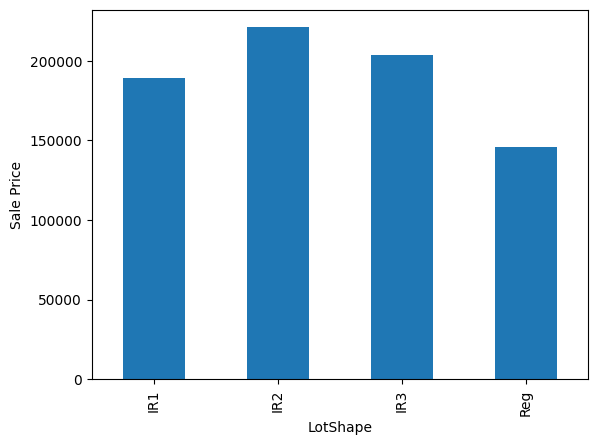

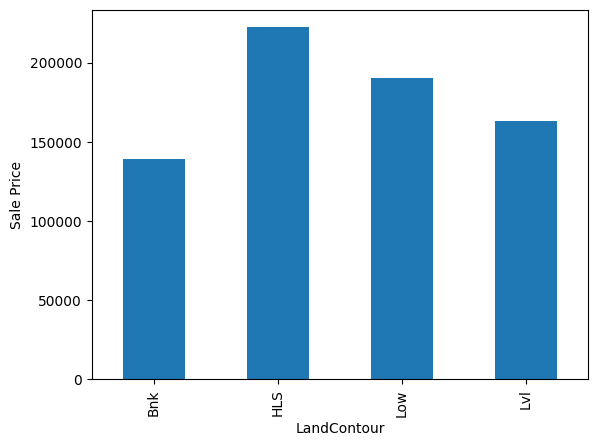

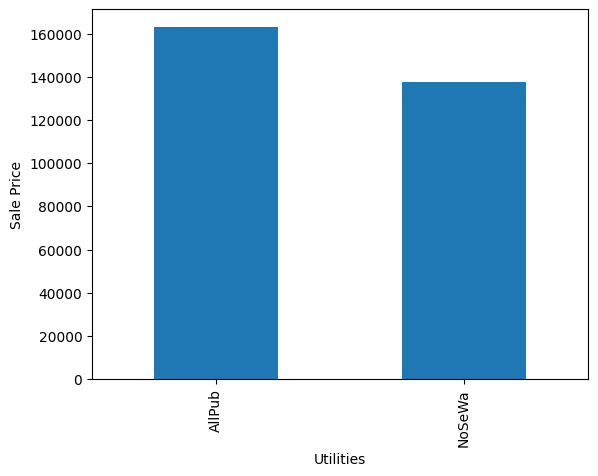

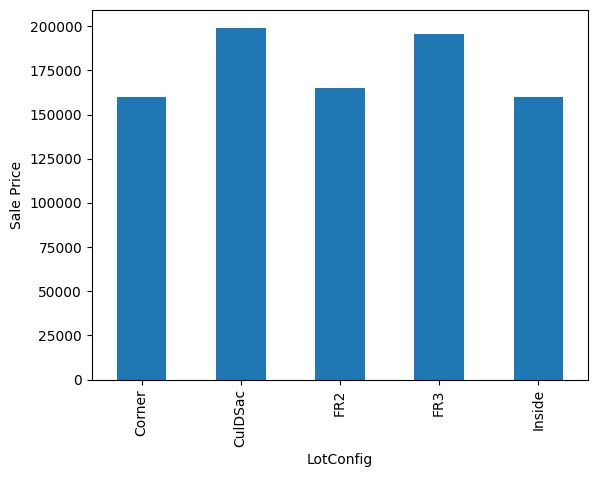

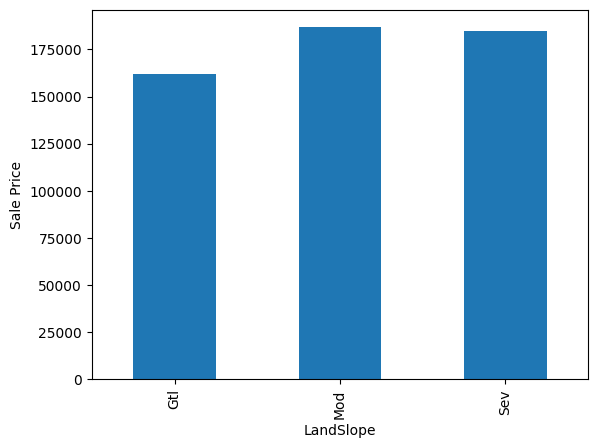

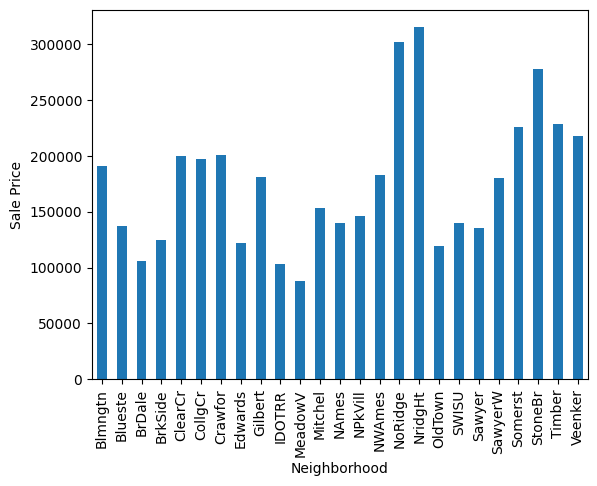

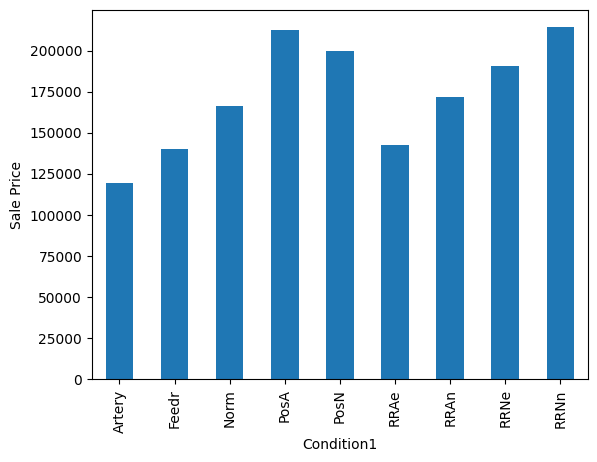

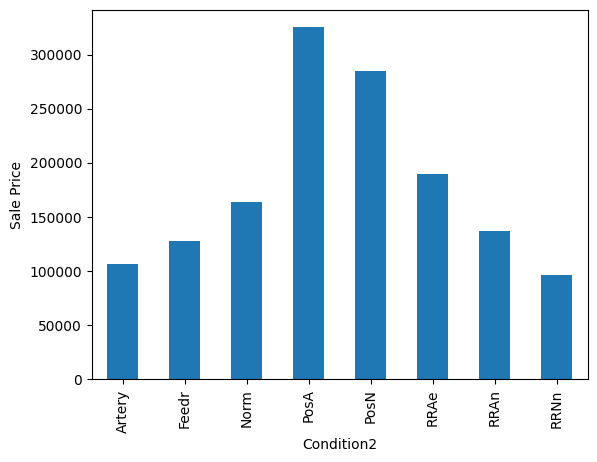

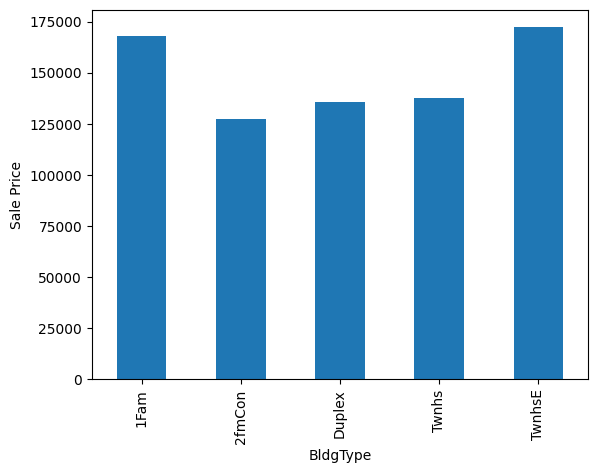

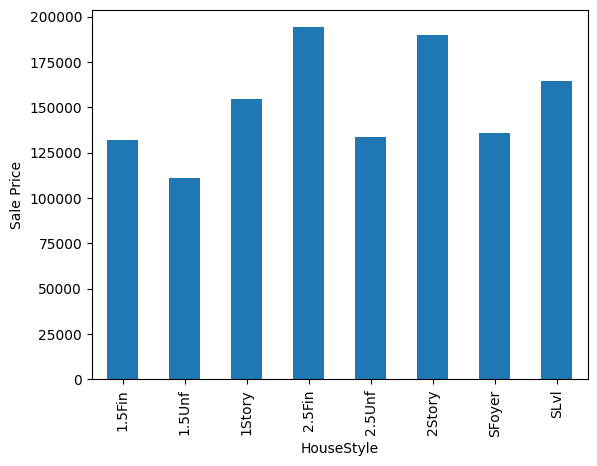

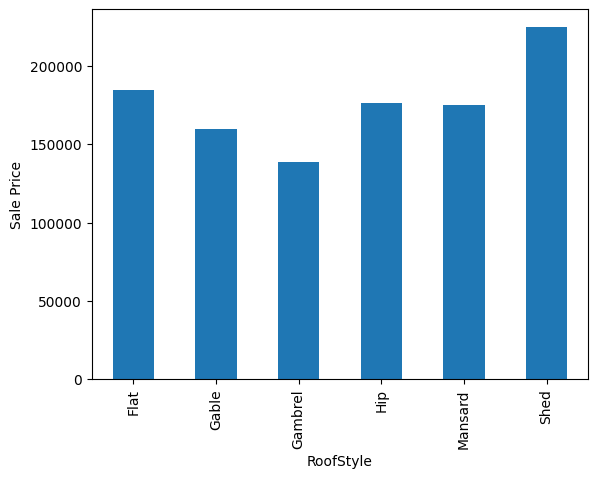

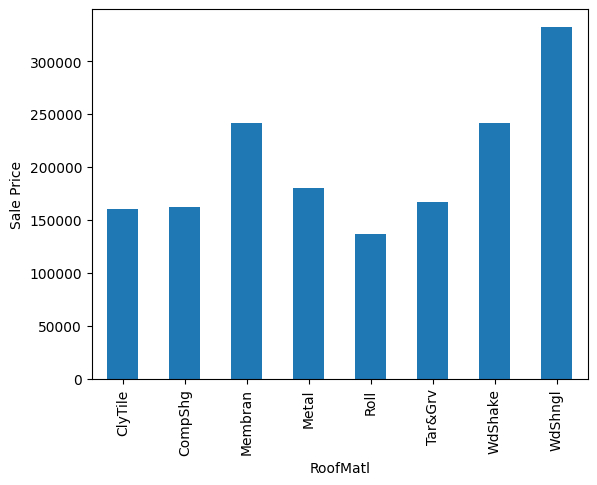

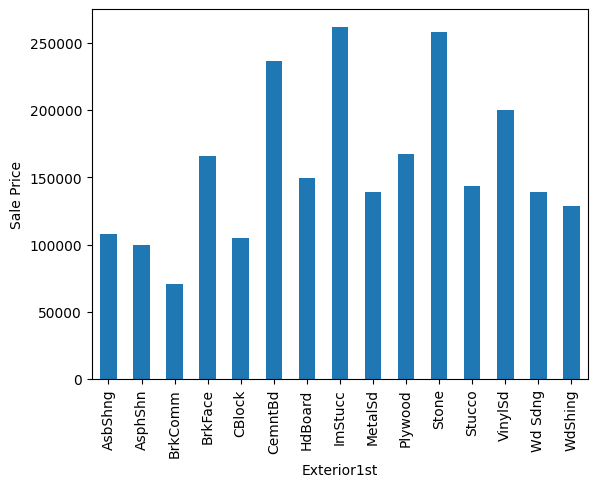

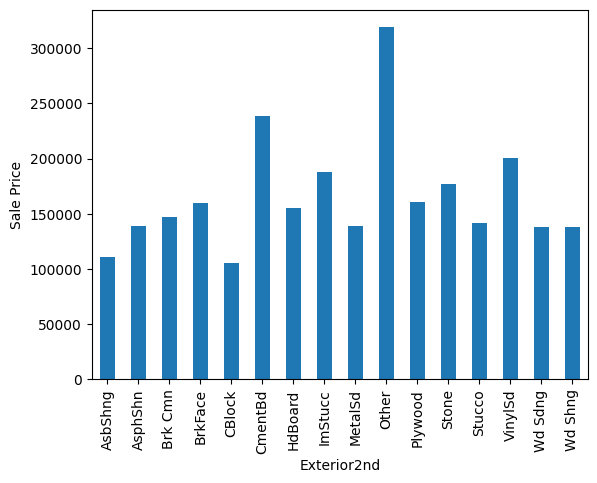

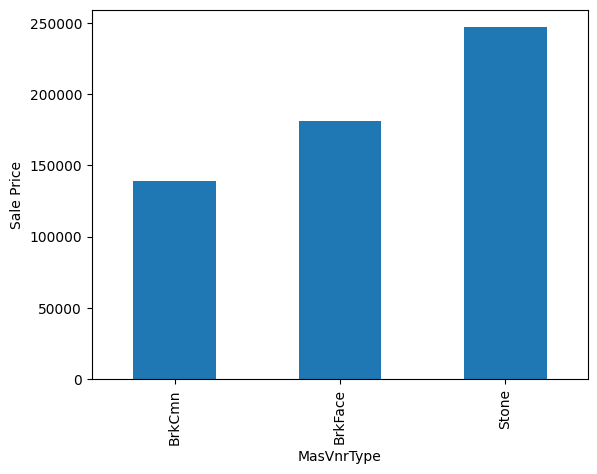

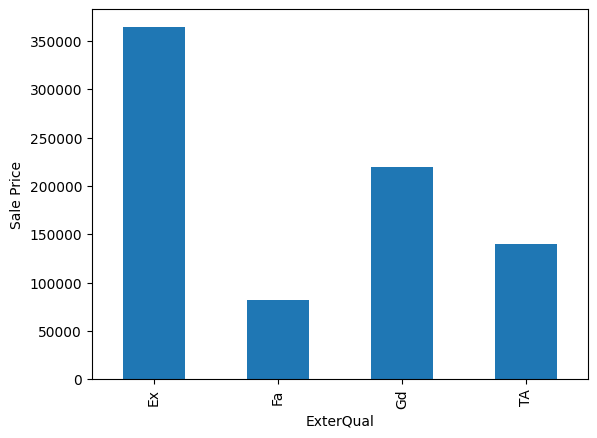

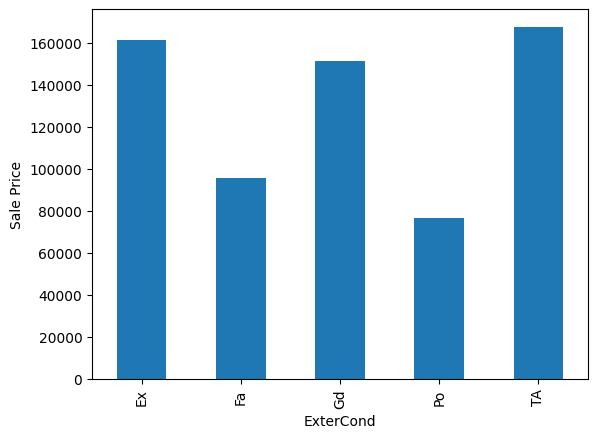

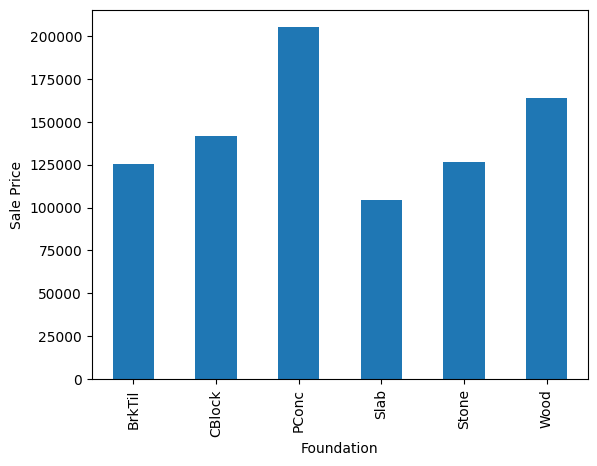

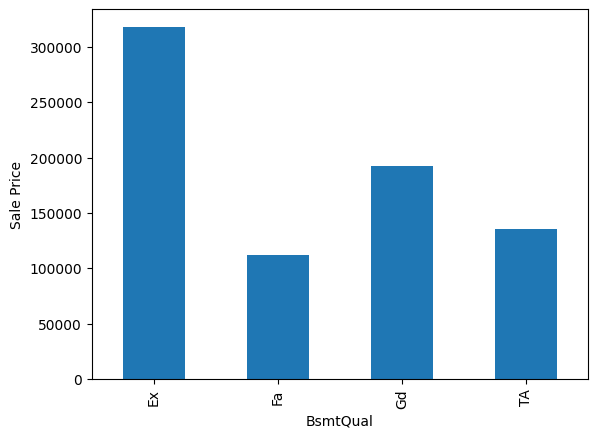

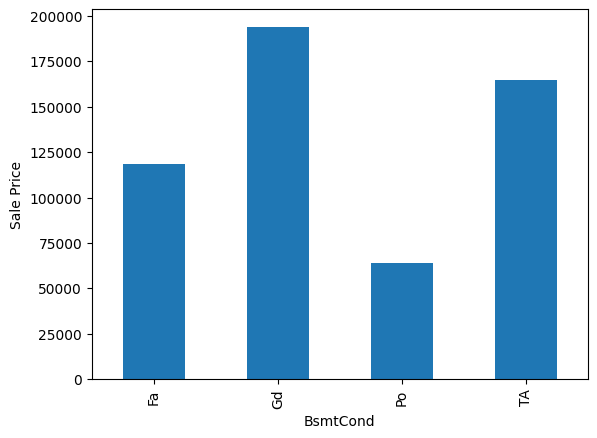

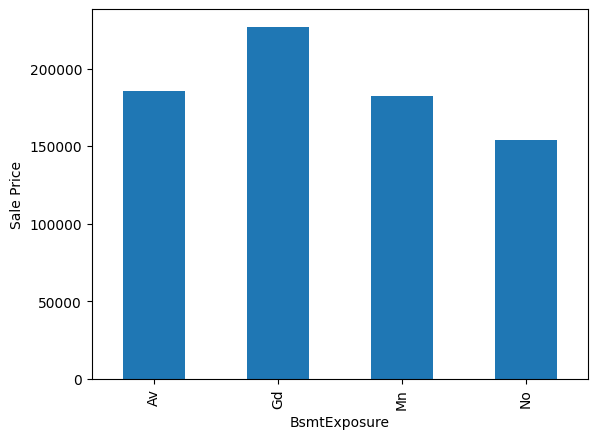

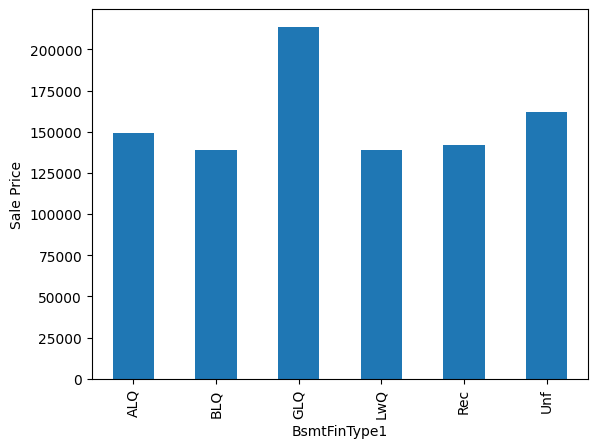

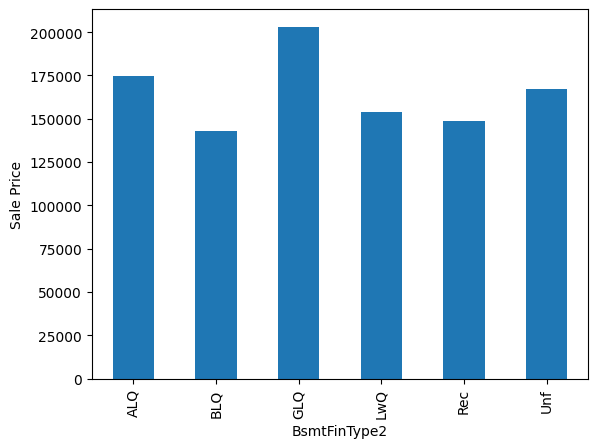

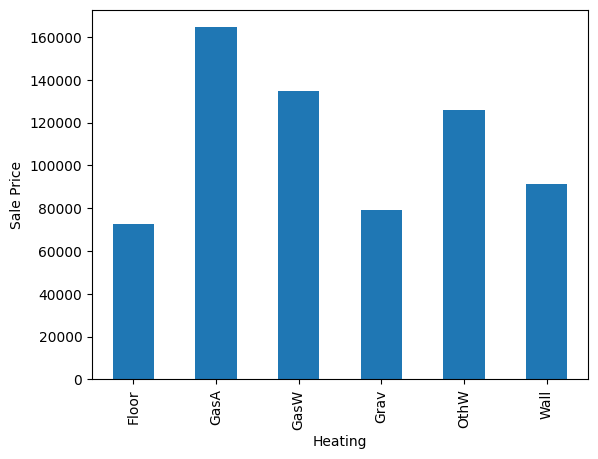

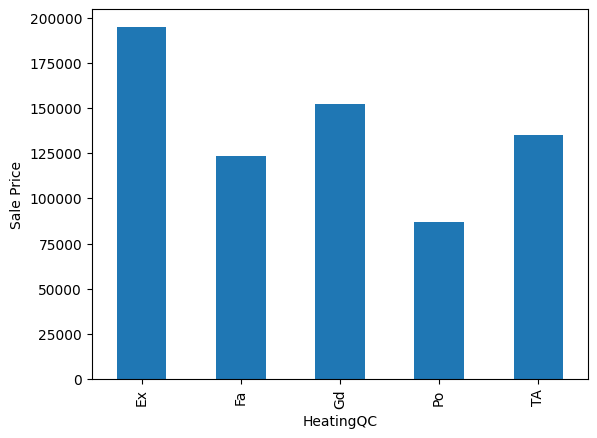

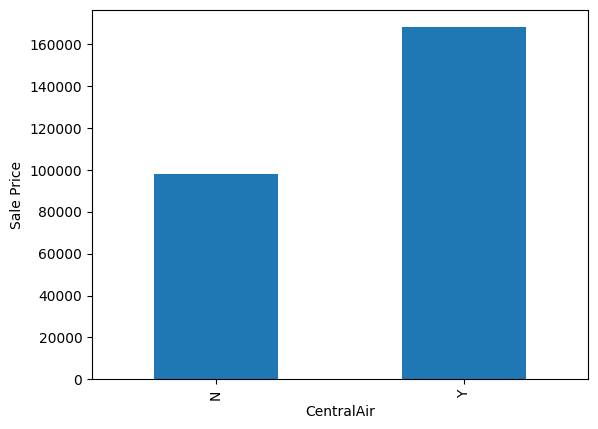

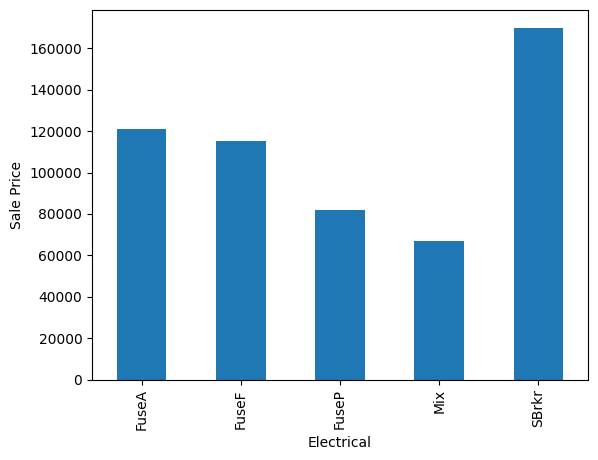

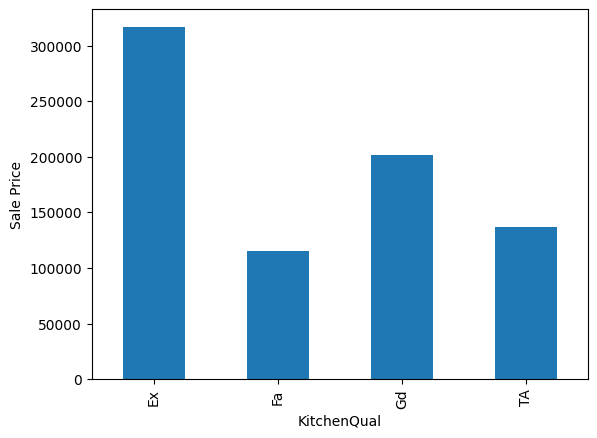

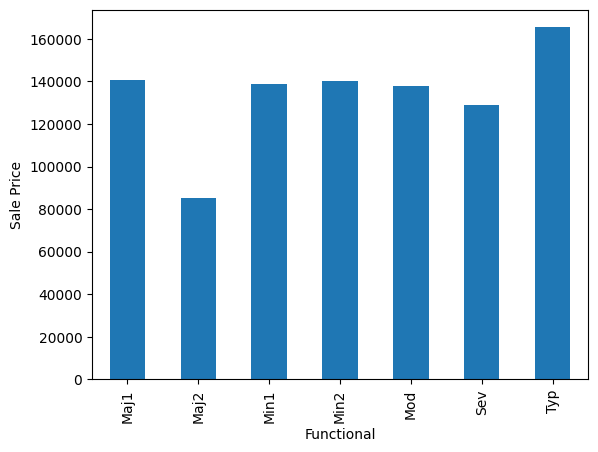

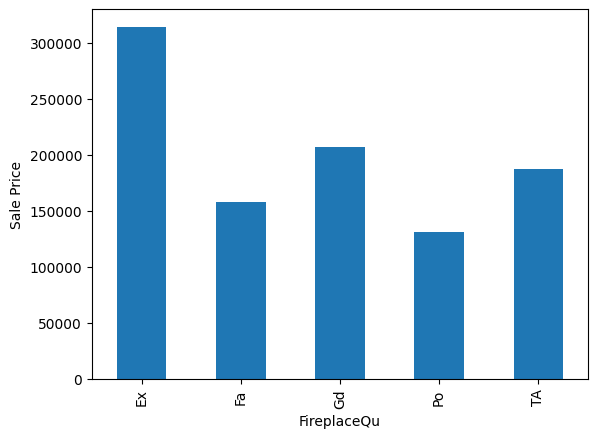

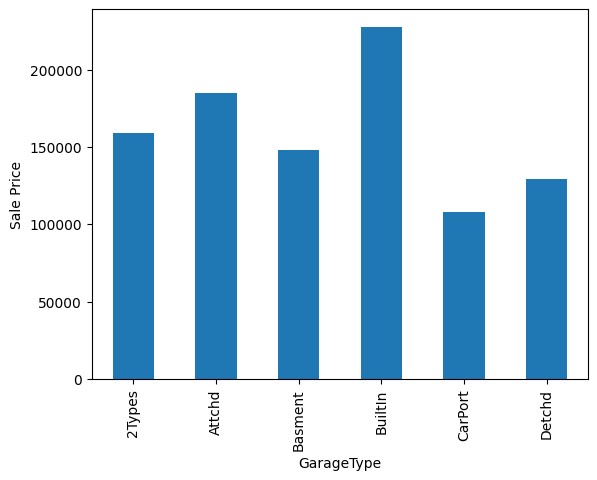

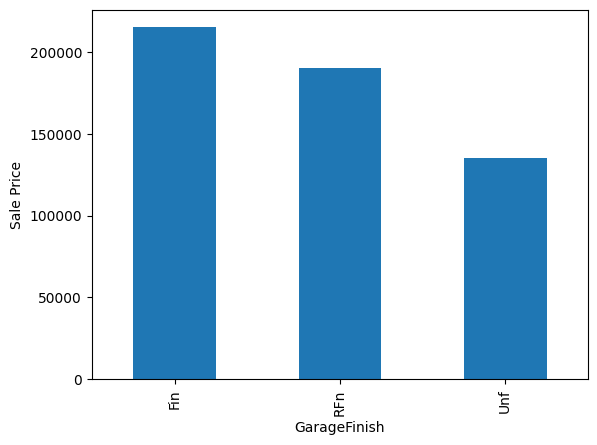

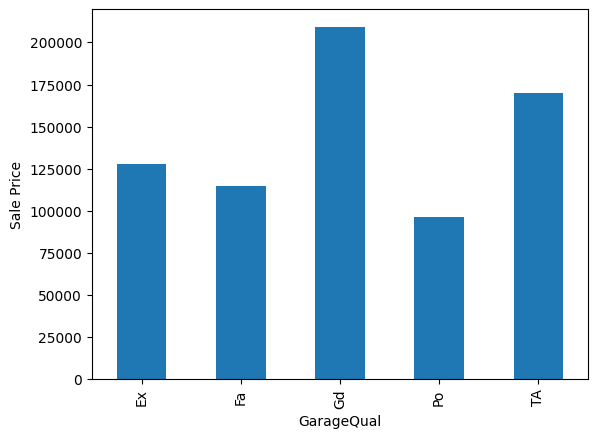

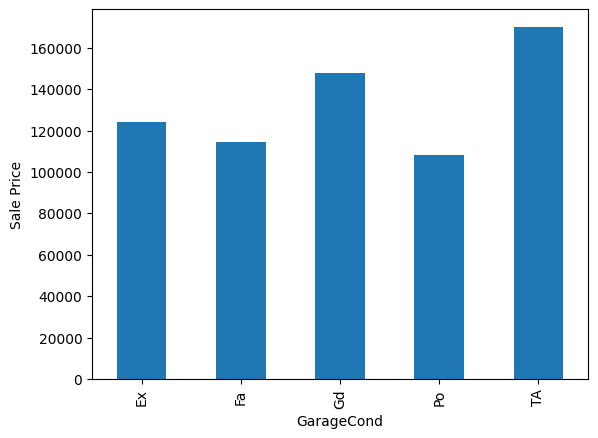

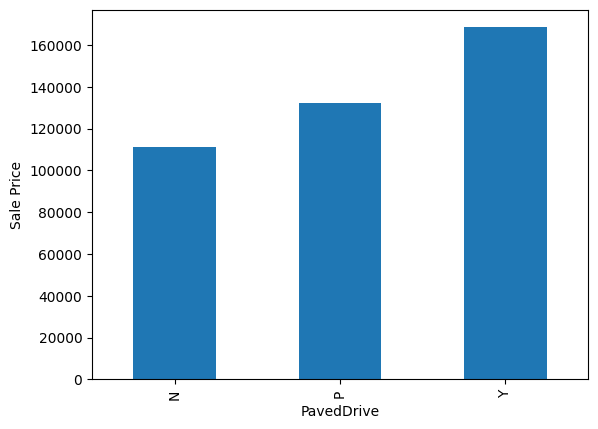

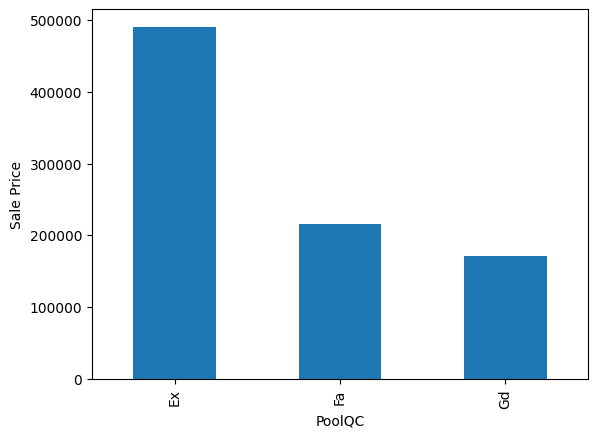

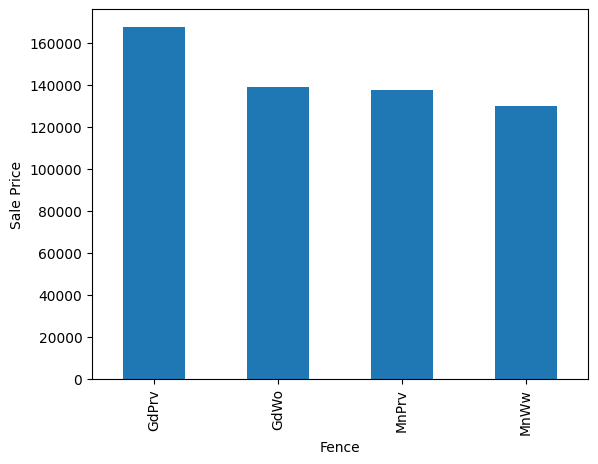

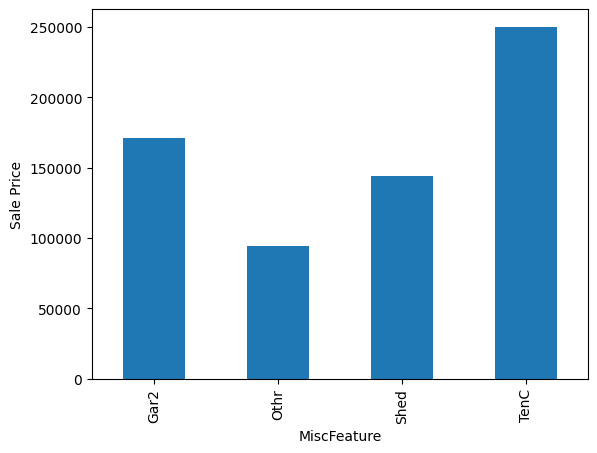

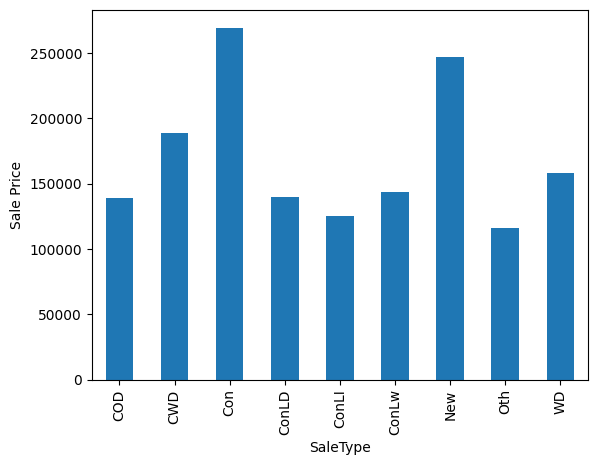

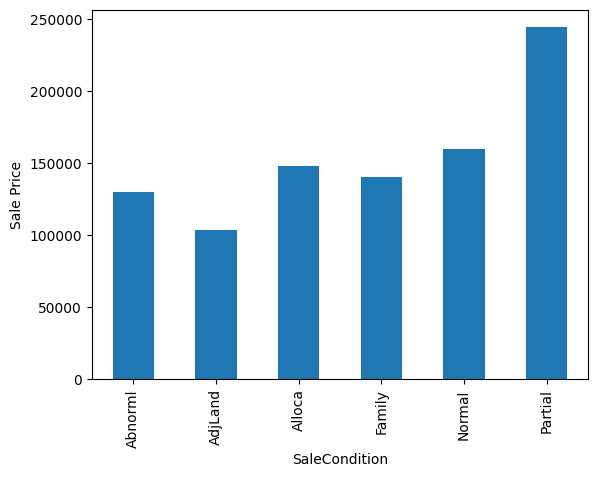

In [267]:
for feature in variables_categoricas:
  data = df.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel("Sale Price")
  plt.show()

#Feature engineering


In [268]:
features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0 and df[feature].dtypes == "O"]
for features in features_nan:
  print(f'para el feature {features} hay %{np.round(df[features].isnull().mean(),2)}')

para el feature Alley hay %0.94
para el feature MasVnrType hay %0.6
para el feature BsmtQual hay %0.03
para el feature BsmtCond hay %0.03
para el feature BsmtExposure hay %0.03
para el feature BsmtFinType1 hay %0.03
para el feature BsmtFinType2 hay %0.03
para el feature Electrical hay %0.0
para el feature FireplaceQu hay %0.47
para el feature GarageType hay %0.06
para el feature GarageFinish hay %0.06
para el feature GarageQual hay %0.06
para el feature GarageCond hay %0.06
para el feature PoolQC hay %1.0
para el feature Fence hay %0.81
para el feature MiscFeature hay %0.96


In [269]:
error= [feature for feature in df.columns if df[feature].isnull().sum()>0]

In [270]:
df["Electrical"]


0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [271]:
numerical_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes != "O"]
for features in numerical_nan:
  print(f'para el feature {features} hay %{np.round(df[features].isnull().mean(),2)}')

para el feature LotFrontage hay %0.18
para el feature MasVnrArea hay %0.01
para el feature GarageYrBlt hay %0.06


In [272]:
numerical_nan1 = [feature for feature in dftest.columns if dftest[feature].isnull().sum()>0 and dftest[feature].dtypes != "O"]

for features in numerical_nan:
  print(f'para el feature {features} hay %{np.round(dftest[features].isnull().mean(),2)}')

para el feature LotFrontage hay %0.16
para el feature MasVnrArea hay %0.01
para el feature GarageYrBlt hay %0.05


In [273]:
missingTest = [feature for feature in dftest.columns if dftest[feature].isnull().sum()>0 and dftest[feature].dtypes == "O"]


In [274]:
missingTest

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [275]:
def remplazarNulos (dataset,arraydevalores):
  data=dataset.copy()
  data[arraydevalores]= data[arraydevalores].fillna("Missing")
  return data

In [276]:
df = remplazarNulos(df,features_nan)
dftest = remplazarNulos(dftest,missingTest) #transformacion en test

In [277]:
for feature in numerical_nan:
  mediana= df[feature].median()

  df[feature+'nan']=np.where(df[feature].isnull(),1,0)
  df[feature].fillna(mediana,inplace=True)
df[numerical_nan].isnull().sum()


C:\Users\emi87\AppData\Local\Temp\ipykernel_30196\1326684934.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(mediana,inplace=True)
C:\Users\emi87\AppData\Local\Temp\ipykernel_30196\1326684934.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [278]:
for feature in numerical_nan1:
  mediana= dftest[feature].median()

  dftest[feature+'nan']=np.where(dftest[feature].isnull(),1,0)
  dftest[feature].fillna(mediana,inplace=True)# transformacion en test
dftest[numerical_nan1].isnull().sum()


C:\Users\emi87\AppData\Local\Temp\ipykernel_30196\3821774733.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dftest[feature].fillna(mediana,inplace=True)# transformacion en test
C:\Users\emi87\AppData\Local\Temp\ipykernel_30196\3821774733.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [279]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  df[feature] = df["YrSold"]-df[feature]


In [280]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:#transformacion en test
  dftest[feature] = dftest["YrSold"]-dftest[feature]

In [281]:
variablessincero = [feature for feature in variables_numericas if (df[feature]!=0).all() and feature not in ["Id","SalePrice"] ]

In [282]:
feature_a = ['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'OpenPorchSF',  'YrSold']

In [283]:
df[feature_a].dtypes

LotFrontage     float64
LotArea           int64
Neighborhood     object
OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
BsmtFinSF1        int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
GrLivArea         int64
FullBath          int64
KitchenQual      object
FireplaceQu      object
GarageArea        int64
OpenPorchSF       int64
YrSold            int64
dtype: object

In [284]:
df["FireplaceQu"].value_counts()

FireplaceQu
Missing    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20
Name: count, dtype: int64

In [285]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,8,2007,WD,Normal,175000,0,0,0
1456,1457,20,RL,85.0,13175,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2010,WD,Normal,210000,0,0,0
1457,1458,70,RL,66.0,9042,Pave,Missing,Reg,Lvl,AllPub,...,Shed,2500,5,2010,WD,Normal,266500,0,0,0
1458,1459,20,RL,68.0,9717,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,4,2010,WD,Normal,142125,0,0,0


In [286]:
def log_transform(df):
    # Copia el DataFrame para no modificar el original
    df_transformed = df.copy()
    
    feature_a = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath',
       'GarageArea', 'OpenPorchSF',  'YrSold']
    
    # Identifica las columnas para las que aplicar la transformación
    variablessincero = [feature for feature in feature_a if (df[feature]!=0).all() and feature not in ["Id","SalePrice"] ]
    
    # Aplica la transformación logarítmica
    for feature in variablessincero:
        df_transformed[feature] = np.log(df_transformed[feature])
    
    return df_transformed

In [287]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [288]:
import pickle

pickle.dump(log_transform,open("logtransform.pkl","wb") )

picklelog=pickle.load(open("logtransform.pkl","rb"))

In [289]:
# for feature in variablessincero:
#   df[feature]=np.log(df[feature])
#   dftest[feature]=np.log(dftest[feature]) # Aplicacion al test

df= picklelog(df)
dftest= picklelog(dftest)

In [290]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,7.604894,WD,Normal,208500,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,7.604396,WD,Normal,181500,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,7.604894,WD,Normal,223500,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,7.603898,WD,Abnorml,140000,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,7.604894,WD,Normal,250000,0,0,0


In [291]:
dftest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,20,RH,4.382027,9.360655,Pave,Missing,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,4.394449,9.565704,Pave,Missing,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,4.304065,9.534595,Pave,Missing,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,4.356709,9.208138,Pave,Missing,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,3.761200,8.518193,Pave,Missing,IR1,HLS,AllPub,...,0,0,0,0,0,0,0,0,0,0


In [292]:
dftest.isnull().sum().sum()

np.int64(0)

#Remover Categoricas NO relevantes

In [293]:
for feature in variables_categoricas:
  temp=df.groupby(feature)["SalePrice"].count()/len(df)
  temp_df=temp[temp>0.01].index
  df[feature]=np.where(df[feature].isin(temp_df),df[feature],"Rare_var")
  dftest[feature]=np.where(dftest[feature].isin(temp_df),dftest[feature],"Rare_var")


In [294]:
for feature in variables_categoricas:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    print(labels_ordered)

    df[feature]=df[feature].map(labels_ordered)
    dftest[feature]=dftest[feature].map(labels_ordered)

{'Rare_var': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}
{'Rare_var': 0, 'Pave': 1}
{'Grvl': 0, 'Pave': 1, 'Missing': 2}
{'Reg': 0, 'IR1': 1, 'Rare_var': 2, 'IR2': 3}
{'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}
{'Rare_var': 0, 'AllPub': 1}
{'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare_var': 3, 'CulDSac': 4}
{'Gtl': 0, 'Mod': 1, 'Rare_var': 2}
{'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'NWAmes': 11, 'Rare_var': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}
{'Artery': 0, 'Feedr': 1, 'Rare_var': 2, 'RRAn': 3, 'Norm': 4, 'PosN': 5}
{'Rare_var': 0, 'Norm': 1}
{'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, 'TwnhsE': 3, '1Fam': 4}
{'SFoyer': 0, '1.5Fin': 1, 'Rare_var': 2, 'SLvl': 3, '1Story': 4, '2Story': 5}
{'Gable': 0, 'Rare_var': 1, 'Hip': 2}
{'CompShg': 0, 'Rare_var': 1}
{'AsbShng': 0, 'MetalSd': 1

In [295]:
dasd = [feature for feature in dftest.columns if dftest[feature].isnull().sum()>0]

In [296]:
dftest["KitchenQual"].fillna(0,inplace=True)

C:\Users\emi87\AppData\Local\Temp\ipykernel_30196\2664660259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dftest["KitchenQual"].fillna(0,inplace=True)


In [297]:
columns_to_drop = [
    'BsmtCond', 'BsmtQual', 'BsmtUnfSF', 'OverallCond', 'WoodDeckSF', 'Exterior1st',
    'Exterior2nd', 'TotRmsAbvGrd', 'BsmtFullBath', 'GarageFinish', 'GarageYrBlt',
    'HalfBath', 'GarageCars', 'BsmtExposure', 'EnclosedPorch', 'MSSubClass', 'Condition1',
    'ExterQual', 'SaleCondition', 'GarageQual', 'Electrical', 'LotShape', 'RoofMatl',
    'LandContour', 'GarageType', 'CentralAir', 'Fireplaces', 'LandSlope', 'LotConfig',
    'RoofStyle', 'MasVnrType', 'LowQualFinSF', 'BsmtFinType1', 'GarageYrBltnan', 'MSZoning',
    'HouseStyle', 'BldgType', 'BsmtHalfBath', 'HeatingQC', '3SsnPorch', 'MasVnrAreanan',
    'ScreenPorch', 'GarageCond', 'Fence', 'PavedDrive', 'BsmtFinSF2', 'PoolArea',
    'BedroomAbvGr', 'SaleType', 'BsmtFinType2', 'LotFrontagenan', 'KitchenAbvGr',
    'Foundation', 'PoolQC', 'Alley', 'ExterCond', 'Functional', 'Heating', 'MiscVal',
    'MiscFeature', 'Street', 'Condition2', 'Utilities',"MoSold"
]

In [298]:
feature_scales =['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'OpenPorchSF',  'YrSold']

#Escalar

In [299]:
feature_scale= [feature for feature in df.columns if feature not in ["SalePrice","Id"]]

In [300]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [301]:
dftest[feature_scale]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,20,2,4.382027,9.360655,1,2,0,1,1,0,...,2,2,0,6,7.605890,2,3,0,0,0
1,20,3,4.394449,9.565704,1,2,1,1,1,2,...,4,1,12500,6,7.605890,2,3,0,0,0
2,60,3,4.304065,9.534595,1,2,1,1,1,0,...,2,2,0,3,7.605890,2,3,0,0,0
3,60,3,4.356709,9.208138,1,2,1,1,1,0,...,4,2,0,6,7.605890,2,3,0,0,0
4,120,3,3.761200,8.518193,1,2,1,3,1,0,...,4,2,0,1,7.605890,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1,3.044522,7.568379,1,2,0,1,1,0,...,4,2,0,6,7.603898,2,3,0,0,1
1455,160,1,3.044522,7.546446,1,2,0,1,1,0,...,4,2,0,4,7.603898,2,0,0,0,0
1456,20,3,5.075174,9.903488,1,2,0,1,1,0,...,4,2,0,9,7.603898,2,0,0,0,0
1457,85,3,4.127134,9.253496,1,2,0,1,1,0,...,2,0,700,7,7.603898,2,3,0,0,1


In [302]:
dfescaled = df[['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'OpenPorchSF',  'YrSold']]

In [303]:
scaler.fit(dfescaled)

MinMaxScaler()

In [304]:
dftest[feature_scale]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,20,2,4.382027,9.360655,1,2,0,1,1,0,...,2,2,0,6,7.605890,2,3,0,0,0
1,20,3,4.394449,9.565704,1,2,1,1,1,2,...,4,1,12500,6,7.605890,2,3,0,0,0
2,60,3,4.304065,9.534595,1,2,1,1,1,0,...,2,2,0,3,7.605890,2,3,0,0,0
3,60,3,4.356709,9.208138,1,2,1,1,1,0,...,4,2,0,6,7.605890,2,3,0,0,0
4,120,3,3.761200,8.518193,1,2,1,3,1,0,...,4,2,0,1,7.605890,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1,3.044522,7.568379,1,2,0,1,1,0,...,4,2,0,6,7.603898,2,3,0,0,1
1455,160,1,3.044522,7.546446,1,2,0,1,1,0,...,4,2,0,4,7.603898,2,0,0,0,0
1456,20,3,5.075174,9.903488,1,2,0,1,1,0,...,4,2,0,9,7.603898,2,0,0,0,0
1457,85,3,4.127134,9.253496,1,2,0,1,1,0,...,2,0,700,7,7.603898,2,3,0,0,1


In [305]:
scaler.transform(dftest[['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'OpenPorchSF',  'YrSold']])

array([[0.49506375, 0.42872552, 0.36363636, ..., 0.51480959, 0.        ,
        1.        ],
       [0.49966182, 0.4688572 , 0.36363636, ..., 0.22002821, 0.06581353,
        1.        ],
       [0.46620707, 0.46276863, 0.59090909, ..., 0.33991537, 0.06215722,
        1.        ],
       ...,
       [0.75162522, 0.53496717, 0.40909091, ..., 0.40620592, 0.        ,
        0.        ],
       [0.40071794, 0.40775256, 0.40909091, ..., 0.        , 0.05850091,
        0.        ],
       [0.46620707, 0.39186645, 0.40909091, ..., 0.4583921 , 0.08775137,
        0.        ]])

In [306]:
data = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scales]), columns=feature_scales)],
                    axis=1)

In [307]:
data.to_csv('X_train.csv',index=False)

In [308]:
testid = dftest["Id"]

In [309]:
dftest[feature_scales]

,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,FireplaceQu,GarageArea,OpenPorchSF,YrSold
0,4.382027,9.360655,8,1.609438,49,49,0.0,468.0,882.0,6.797940,0,6.797940,1,1.0,1,730.0,0,7.605890
1,4.394449,9.565704,8,1.791759,52,52,108.0,923.0,1329.0,7.192182,0,7.192182,1,2.0,1,312.0,36,7.605890
2,4.304065,9.534595,13,1.609438,13,12,0.0,791.0,928.0,6.833032,701,7.395722,2,1.0,3,482.0,34,7.605890
3,4.356709,9.208138,13,1.791759,12,12,20.0,602.0,926.0,6.830874,678,7.380256,2,2.0,4,470.0,36,7.605890
4,3.761200,8.518193,20,2.079442,18,18,0.0,263.0,1280.0,7.154615,0,7.154615,2,2.0,1,506.0,82,7.605890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.044522,7.568379,0,1.386294,36,36,0.0,0.0,546.0,6.302619,546,6.995766,1,1.0,1,0.0,0,7.603898
1455,3.044522,7.546446,0,1.386294,36,36,0.0,252.0,546.0,6.302619,546,6.995766,1,1.0,1,286.0,24,7.603898
1456,5.075174,9.903488,9,1.609438,46,10,0.0,1224.0,1224.0,7.109879,0,7.109879,1,1.0,3,576.0,0,7.603898
1457,4.127134,9.253496,9,1.609438,14,14,0.0,337.0,912.0,6.877296,0,6.877296,1,1.0,1,0.0,32,7.603898


In [310]:
test =  pd.DataFrame(scaler.transform(dftest[feature_scales]), columns=feature_scales)

In [311]:
X_train=data

In [312]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [313]:
y_train=data[['SalePrice']]

In [314]:
X_train=data.drop(['Id','SalePrice'],axis=1)

#Feature Selection


In [315]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [316]:
SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,  positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [317]:
feature_sel_model.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [318]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]


In [319]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 18
selected features: 18


In [320]:
selected_feat

Index(['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'OpenPorchSF', 'YrSold'],
      dtype='object')

In [321]:
X_train=X_train[selected_feat] #Conclusión de los features seleccionados en la variable X_train

# Entrenamiento

In [322]:
from sklearn.datasets import make_classification



In [323]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.1,random_state=0)

In [324]:
import sklearn as sk

In [325]:
from sklearn import ensemble


In [326]:
print(f"scikit-learn version: {sk.__version__}")


scikit-learn version: 1.5.1


In [327]:
reg = sk.ensemble.GradientBoostingRegressor(n_estimators=200, max_depth=15, random_state=42)


In [328]:
X_train_cleaned = X_train.drop(columns=columns_to_drop, errors='ignore')


In [329]:
X_test_cleaned = X_test.drop(columns=columns_to_drop, errors='ignore')

In [330]:
reg.fit(X_train_cleaned, y_train)


c:\Users\emi87\OneDrive\Escritorio\Data Projects\Ml Projects\BostonHousePricing\myenv\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(max_depth=15, n_estimators=200, random_state=42)

In [331]:
columnasModelo= X_train_cleaned.columns

In [332]:
importances = reg.feature_importances_

# Crear una lista con los nombres de las características y sus importancias
feature_names = X_train.columns

# Crear una lista con los nombres de las características y sus importancias
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Mostrar la lista con puntajes
for feature, importance in feature_importances:
    print(f"{feature}: {importance:.4f}")

OverallQual: 0.5323
Neighborhood: 0.1329
GrLivArea: 0.1030
TotalBsmtSF: 0.0385
BsmtFinSF1: 0.0383
1stFlrSF: 0.0328
LotFrontage: 0.0179
MasVnrArea: 0.0172
2ndFlrSF: 0.0171
LotArea: 0.0145
GarageArea: 0.0120
YearRemodAdd: 0.0080
OpenPorchSF: 0.0073
KitchenQual: 0.0072
YearBuilt: 0.0062
YrSold: 0.0058
FireplaceQu: 0.0050
FullBath: 0.0040


In [333]:
columnasModelo

Index(['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'OpenPorchSF', 'YrSold'],
      dtype='object')

In [334]:
y_pred = reg.predict(X_test_cleaned)

print(sk.metrics.mean_squared_error(y_test, y_pred, squared=False))

44167.32615163308


c:\Users\emi87\OneDrive\Escritorio\Data Projects\Ml Projects\BostonHousePricing\myenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [335]:
test

,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,FireplaceQu,GarageArea,OpenPorchSF,YrSold
0,0.495064,0.428726,0.363636,0.698970,0.360294,0.819672,0.00000,0.082920,0.144354,0.373438,0.000000,0.349081,0.333333,0.333333,0.2,0.514810,0.000000,1.0
1,0.499662,0.468857,0.363636,0.778151,0.382353,0.868852,0.06750,0.163536,0.217512,0.522632,0.000000,0.488544,0.333333,0.666667,0.2,0.220028,0.065814,1.0
2,0.466207,0.462769,0.590909,0.698970,0.095588,0.213115,0.00000,0.140149,0.151882,0.386718,0.339467,0.560546,0.666667,0.333333,0.6,0.339915,0.062157,1.0
3,0.485693,0.398875,0.590909,0.778151,0.088235,0.213115,0.01250,0.106662,0.151555,0.385901,0.328329,0.555075,0.666667,0.666667,0.8,0.331453,0.065814,1.0
4,0.265271,0.263841,0.909091,0.903090,0.132353,0.311475,0.00000,0.046598,0.209493,0.508416,0.000000,0.475254,0.666667,0.666667,0.2,0.356841,0.149909,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.000000,0.077946,0.000000,0.602060,0.264706,0.606557,0.00000,0.000000,0.089362,0.185992,0.264407,0.419061,0.333333,0.333333,0.2,0.000000,0.000000,0.0
1455,0.000000,0.073654,0.000000,0.602060,0.264706,0.606557,0.00000,0.044649,0.089362,0.185992,0.264407,0.419061,0.333333,0.333333,0.2,0.201693,0.043876,0.0
1456,0.751625,0.534967,0.409091,0.698970,0.338235,0.180328,0.00000,0.216867,0.200327,0.491486,0.000000,0.459429,0.333333,0.333333,0.6,0.406206,0.000000,0.0
1457,0.400718,0.407753,0.409091,0.698970,0.102941,0.245902,0.00000,0.059709,0.149264,0.403469,0.000000,0.377153,0.333333,0.333333,0.2,0.000000,0.058501,0.0


In [336]:
predicciones = reg.predict(test)

In [337]:
array=[80.0,	11622,	8,	5,	49,	49,	0.0,	468.0,	882.0,	896,	0,	896,	1,	1.0,	1,	730.0,	0,	2010]

In [338]:
predicciones

array([134921.69795943, 145805.74529688, 190399.49934554, ...,
       150642.29300194,  94120.45249391, 199149.93041688])

In [339]:
import pickle
pickle.dump(reg,open("regmodel.pkl","wb") )
pickle.dump(scaler,open("scaler.pkl","wb") )
pickle.dump(log_transform,open("logtransform.pkl","wb") )
picklemodel=pickle.load(open("regmodel.pkl","rb"))
pickletrans=pickle.load(open("scaler.pkl","rb"))
picklelog=pickle.load(open("logtransform.pkl","rb"))

In [340]:
picklelog(data)

,Id,SalePrice,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,FireplaceQu,GarageArea,OpenPorchSF,YrSold
0,1,208500,0.418208,0.366344,0.681818,0.845098,0.036765,0.098361,0.122500,0.125089,0.140098,0.356155,0.413559,0.577712,0.666667,0.666667,0.2,0.386460,0.111517,0.500249
1,2,181500,0.495064,0.391317,0.545455,0.778151,0.227941,0.524590,0.000000,0.173281,0.206547,0.503056,0.000000,0.470245,0.666667,0.333333,0.6,0.324401,0.000000,0.250187
2,3,223500,0.434909,0.422359,0.681818,0.845098,0.051471,0.114754,0.101250,0.086109,0.150573,0.383441,0.419370,0.593095,0.666667,0.666667,0.6,0.428773,0.076782,0.500249
3,4,140000,0.388581,0.390295,0.727273,0.845098,0.669118,0.606557,0.000000,0.038271,0.123732,0.399941,0.366102,0.579157,0.333333,0.666667,0.8,0.452750,0.063985,0.000000
4,5,250000,0.513123,0.468761,1.000000,0.903090,0.058824,0.147541,0.218750,0.116052,0.187398,0.466237,0.509927,0.666523,0.666667,0.666667,0.6,0.589563,0.153565,0.500249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,0.400718,0.353592,0.590909,0.778151,0.058824,0.131148,0.000000,0.000000,0.155974,0.396777,0.336077,0.564433,0.666667,0.333333,0.6,0.324401,0.073126,0.250187
1456,1457,210000,0.517503,0.453273,0.500000,0.778151,0.235294,0.377049,0.074375,0.139972,0.252373,0.690872,0.000000,0.645810,0.666667,0.333333,0.6,0.352609,0.000000,1.000000
1457,1458,266500,0.423859,0.379597,0.727273,0.845098,0.507353,0.081967,0.000000,0.048724,0.188543,0.480189,0.557869,0.688669,0.666667,0.666667,0.8,0.177715,0.109689,1.000000
1458,1459,142125,0.434909,0.393688,0.363636,0.698970,0.441176,0.245902,0.000000,0.008682,0.176432,0.443419,0.000000,0.414497,0.333333,0.666667,0.2,0.169252,0.000000,1.000000


In [341]:
primera_fila_array = np.array(df.iloc[0]).reshape(1,-1)


In [342]:
primera_fila_array = df.iloc[0]

In [343]:
data_to_predict = pd.DataFrame([
    {
        'LotFrontage': 65.0, 'LotArea': 8450, "Neighborhood":13,'OverallQual': 15, 'YearBuilt': 7,
        'YearRemodAdd': 2003, 'MasVnrArea': 2003, 'BsmtFinSF1': 196.0, 'TotalBsmtSF': 706,
        '1stFlrSF': 856, '2ndFlrSF': 856, 'GrLivArea': 1710, 'FullBath': 2, 'GarageArea': 548,
        'OpenPorchSF': 61, 'MoSold': 2008, 'YrSold': 2008,"KitchenQual":1,"FireplaceQu":1
    }
], columns=feature_names)

In [344]:
arrayconformado = [[65.0,	8450,	13,	15,	7,	2003,	2003,	196.0,	706,	856,	856,	1710,	2,	1,	1,	548,	61,	2008]]

In [345]:
pickletrans.transform(data_to_predict)

array([[2.29321979e+01, 1.65240713e+03, 5.90909091e-01, 6.51441723e+00,
        5.14705882e-02, 3.28524590e+01, 1.25187500e+00, 3.47271439e-02,
        1.15548282e-01, 3.21739821e+02, 4.14527845e-01, 6.02857283e+02,
        6.66666667e-01, 3.33333333e-01, 2.00000000e-01, 3.86459803e-01,
        1.11517367e-01, 1.00419851e+06]])

In [346]:
data_to_predict

,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,FireplaceQu,GarageArea,OpenPorchSF,YrSold
0,65.0,8450,13,15,7,2003,2003,196.0,706,856,856,1710,2,1,1,548,61,2008


In [347]:
array

[80.0,
 11622,
 8,
 5,
 49,
 49,
 0.0,
 468.0,
 882.0,
 896,
 0,
 896,
 1,
 1.0,
 1,
 730.0,
 0,
 2010]

In [348]:
valorapredecir=pickletrans.transform(data_to_predict)

In [349]:
valorapredecir

array([[2.29321979e+01, 1.65240713e+03, 5.90909091e-01, 6.51441723e+00,
        5.14705882e-02, 3.28524590e+01, 1.25187500e+00, 3.47271439e-02,
        1.15548282e-01, 3.21739821e+02, 4.14527845e-01, 6.02857283e+02,
        6.66666667e-01, 3.33333333e-01, 2.00000000e-01, 3.86459803e-01,
        1.11517367e-01, 1.00419851e+06]])

In [350]:
picklemodel.predict(valorapredecir)

c:\Users\emi87\OneDrive\Escritorio\Data Projects\Ml Projects\BostonHousePricing\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([500870.43791539])

In [351]:
#Dictionary of neighborhood: {'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'NWAmes': 11, 'Rare_var': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}

